In [3]:
import pandas as pd
import numpy as np

# Exploratory Data Analysis:
## Financial Well-Being Survey
Consumer Financial Protection Bureau (CFPB), 2017

#### Items to address
* What questions can we address with each of these data sets?
* Breakdown of Financial Literacy Education & Behaviors, Home Ownership, Debt-to-Income by Demographic Information (Race/Ethnicity, Age, Gender, etc.)
* Any correlation between financial literacy education and each of our financial success metrics? Any differences among different demographics?
* Include data visualizations where appropriate


In [4]:
df = pd.read_csv("../data/NFWBS_PUF_2016_data.csv")

In [5]:
# Columns that most relate to our problem statement
columns_of_interest = [
    'PUF_ID',
    'agecat',
    'PPEDUC',
    'PPETHM',
    'PPGENDER',
    'PPINCIMP',
    'PPHHSIZE',
    'fpl',
    'PPREG4',
    'PPREG9',
    'FWB1_1',
    'FWB1_5',
    'FS2_3',
    'SUBKNOWL1',
    'ACT1_2',
    'PROPPLAN_3',
    'PROPPLAN_1',
    'MANAGE1_2',
    'MANAGE1_1',
    'MANAGE1_3',
    'SAVEHABIT',
    'AUTOMATED_1',
    'AUTOMATED_2',
    'SAVINGSRANGES',
    'HOUSING',
    'HOUSERANGES',
    'MORTGAGE',
    'PRODHAVE_8',
    'PRODUSE_1',
    'PRODUSE_2',
    'FWBscore',
    'FSscore'
]

In [6]:
# Value mapping to actual responses; might come in handy when doing EDA
value_map = {
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
    "PPEDUC":{
      1: "Less than high school",
      2: "High school degree/GED",
      3: "Some college/Associate",
      4: "Bachelors degree",
      5: "Graduate/professional degree"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
#     "PPINCIMP":{
#       1: "Less than $20,000",
#       2: "$20,000 to $29,999",
#       3: "$30,000 to $39,999",
#       4: "$40,000 to $49,999",
#       5: "$50,000 to $59,999",
#       6: "$60,000 to $74,999",
#       7: "$75,000 to $99,999",
#       8: "$100,000 to $149,999",
#       9: "$150,000 or more"
#     },
    "PPHHSIZE":{
      1: "1",
      2: "2",
      3: "3",
      4: "4",
      5: "5+"
    },
    "fpl":{
      1: "<100% FPL",
      2: "100%-199% FPL",
      3: "200%+ FPL"
    },
    "PPREG4":{
      1: "Northeast",
      2: "Midwest",
      3: "South",
      4: "West"
    },
    "PPREG9":{
      1: "New England",
      2: "Mid-Atlantic",
      3: "East-North Central",
      4: "West-North Central",
      5: "South Atlantic",
      6: "East-South Central",
      7: "West-South Central",
      8: "Mountain",
      9: "Pacific"
    },
    "FWB1_1":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FWB1_5":{
      -4: "Response not written to database",
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "FS2_3":{
      -1: "Refused",
      1: "Never",
      2: "Rarely",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SUBKNOWL1":{
      -1: "Refused",
      1: "1 - Very low",
      2: "2",
      3: "3",
      4: "4",
      5: "5",
      6: "6",
      7: "7 - Very high"
    },
    "ACT1_2":{
      -1: "Refused",
      1: "Not at all",
      2: "Very little",
      3: "Somewhat",
      4: "Very well",
      5: "Completely"
    },
    "PROPPLAN_1":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "PROPPLAN_3":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Neither agree nor disagree",
      4: "Agree",
      5: "Strongly agree"
    },
    "MANAGE1_1":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_2":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "MANAGE1_3":{
      -1: "Refused",
      1: "Not applicable or never",
      2: "Seldom",
      3: "Sometimes",
      4: "Often",
      5: "Always"
    },
    "SAVEHABIT":{
      -1: "Refused",
      1: "Strongly disagree",
      2: "Disagree",
      3: "Disagree slightly",
      4: "Agree slightly",
      5: "Agree",
      6: "Strongly agree"
    },
    "AUTOMATED_1":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "AUTOMATED_2":{
      -1: "Refused",
      0: "No",
      1: "Yes",
      7: "I do not have this type of account"
    },
    "SAVINGSRANGES":{
      -1: "Refused",
      1: "0",
      2: "$1-99",
      3: "$100-999",
      4: "$1,000-4,999",
      5: "$5,000-19,999",
      6: "$20,000-74,999",
      7: "$75,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "HOUSING":{
      -1: "Refused",
      1: "I own my home",
      2: "I rent",
      3: "I do not currently own or rent"
    },
#     "HOUSERANGES":{
#       -1: "Refused",
#       1: "Less than $300",
#       2: "$300-499",
#       3: "$500-749",
#       4: "$750-999",
#       5: "$1,000-1,499",
#       6: "$1,500-1,999",
#       7: "$2,000 or more",
#       98: "I dont know",
#       99: "Prefer not to say"
#     },
    "MORTGAGE":{
      -2: "Question not asked because respondent not in item base",
      -1: "Refused",
      1: "Less than $50,000",
      2: "$50,000-199,999",
      3: "$200,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },
    "PRODHAVE_8":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_1":{
      0: "No",
      1: "Yes"
    },
    "PRODUSE_2":{
      0: "No",
      1: "Yes"
    },
    "FWBscore":{
      -4: "Response not written to database",
      -1: "Refused"
    },
#     "FSscore":{
#       -1: "Refused"
#     },
}

In [7]:
# Column mapping to variable label; might come in handy when doing EDA
col_map = {
    'agecat':'Age Group',
    'PPEDUC':'Education (Highest Degree)',
    'PPETHM':'Race/Ethnicity',
    'PPGENDER':'Gender',
    'PPINCIMP':'Household Income',
    'PPHHSIZE':'Household Size',
    'fpl':'Federal Poverty Level',
    'PPREG4':'Census Region',
    'PPREG9':'Census Division',
    'FWB1_1':'I could handle a major unexpected expense.',
    'FWB1_5':'I am just getting by financially',
    'FS2_3':'I struggle to understand financial information',
    'SUBKNOWL1':'How would you assess your overall financial knowledge?',
    'ACT1_2':'I follow-through on financial goals I set for myself.',
    'PROPPLAN_3':'I set financial goals for what I want to achieve with my money',
    'PROPPLAN_1':'I consult my budget to see how much money I have left',
    'MANAGE1_2':'Stayed within your budget or spending plan',
    'MANAGE1_1':'Paid all your bills on time',
    'MANAGE1_3':'Paid off credit card balance in full',
    'SAVEHABIT':'Putting money into savings is a habit for me',
    'AUTOMATED_1':'A Retirement Savings Account',
    'AUTOMATED_2':'A Non-Retirement Savings Account',
    'SAVINGSRANGES':'How much money do you have in savings today?',
    'HOUSING':'Which one of the following best describes your housing situation?',
    'HOUSERANGES':'About how much do you pay for your home each month?',
    'MORTGAGE':'What do you owe on your home?',
    'PRODHAVE_8':'Student/Education Loan (for yourself or someone else)',
    'PRODUSE_1':'Used payday loan or cash advance loan',
    'PRODUSE_2':'Used pawn loan or auto title loan',
    'FWBscore':'Financial Well-Being Scale score',
    'FSscore':'Financial Skill Scale score'
}

In [8]:
filtered_df = df.loc[:,columns_of_interest]
filtered_df.head()

,PUF_ID,agecat,PPEDUC,PPETHM,PPGENDER,PPINCIMP,PPHHSIZE,fpl,PPREG4,PPREG9,...,AUTOMATED_2,SAVINGSRANGES,HOUSING,HOUSERANGES,MORTGAGE,PRODHAVE_8,PRODUSE_1,PRODUSE_2,FWBscore,FSscore
0,10350,8,4,1,1,7,1,3,4,8,...,0,6,1,4,2,0,0,0,55,44
1,7740,3,2,1,1,6,2,3,2,3,...,0,2,1,4,2,0,0,0,51,43
2,13699,3,3,2,1,6,3,3,4,9,...,1,4,1,3,2,0,0,0,49,42
3,7267,3,2,1,1,8,1,3,3,7,...,-1,-1,-1,99,-2,0,0,0,49,42
4,7375,2,2,3,1,7,5,3,2,4,...,1,98,2,2,-2,0,0,1,49,42


### What questions can we address with this data set?

We can address questions related to: 
* the current state of financial well-being and financial skill levels within the population
* the current state of financial well-being and financial skill levels within sub-populations and different communities
* trends between financial skills and financial well-being among the general population
* trends between financial skills and financial well-being among different sub-populations

## Current state of financial literacy and financial success metrics

#### Breakdown of Financial Literacy Education & Behaviors by Demographic Information

In [9]:
demographic_cols = ['PUF_ID','PPGENDER','PPETHM','agecat']

In [10]:
fin_lit_cols = ['FSscore','FS2_3','SUBKNOWL1','ACT1_2','PROPPLAN_3','PROPPLAN_1','MANAGE1_2']
fin_lit_cols = demographic_cols + fin_lit_cols

In [11]:
fin_lit_df = filtered_df.loc[:,fin_lit_cols]
fin_lit_df = fin_lit_df.astype('int')
fin_lit_df = fin_lit_df.replace(value_map)
fin_lit_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,FSscore,FS2_3,SUBKNOWL1,ACT1_2,PROPPLAN_3,PROPPLAN_1,MANAGE1_2
0,10350,Male,"White, Non-Hispanic",75+,44,Often,5,Somewhat,Agree,Strongly agree,Often
1,7740,Male,"White, Non-Hispanic",35-44,43,Rarely,5,Somewhat,Disagree,Neither agree nor disagree,Often
2,13699,Male,"Black, Non-Hispanic",35-44,42,Sometimes,5,Somewhat,Agree,Agree,Sometimes
3,7267,Male,"White, Non-Hispanic",35-44,42,Sometimes,Refused,Refused,Neither agree nor disagree,Neither agree nor disagree,Often
4,7375,Male,"Other, Non-Hispanic",25-34,42,Sometimes,4,Somewhat,Neither agree nor disagree,Neither agree nor disagree,Sometimes


--- GENDER ---

In [12]:
fs_score_gender = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).sum()
fs_score_gender['Participant_Count'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_gender['FSscore_avg'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).mean()
fs_score_gender['FSscore_median'] = fin_lit_df.loc[:,['PPGENDER','FSscore']].groupby(['PPGENDER']).median()
fs_score_gender

,FSscore,Participant_Count,FSscore_avg,FSscore_median
PPGENDER,,,,
Female,151825,3042,49.909599,49
Male,172473,3352,51.453759,51


In [13]:
fs_score_gender['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

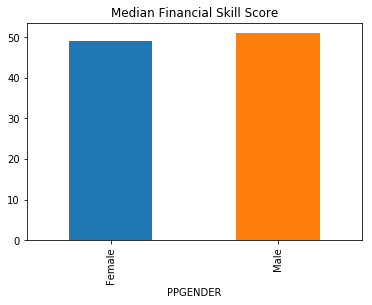

In [14]:
fs_score_gender['FSscore_median'].plot.bar(title='Median Financial Skill Score')

--- RACE/ETHNICITY ---

In [15]:
fs_score_eth = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).sum()
fs_score_eth['Participant_Count'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_eth['FSscore_avg'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).mean()
fs_score_eth['FSscore_median'] = fin_lit_df.loc[:,['PPETHM','FSscore']].groupby(['PPETHM']).median()
fs_score_eth


,FSscore,Participant_Count,FSscore_avg,FSscore_median
PPETHM,,,,
"Black, Non-Hispanic",34979,685,51.064234,50
Hispanic,42463,875,48.529143,47
"Other, Non-Hispanic",16790,336,49.970238,48
"White, Non-Hispanic",230066,4498,51.148510,51


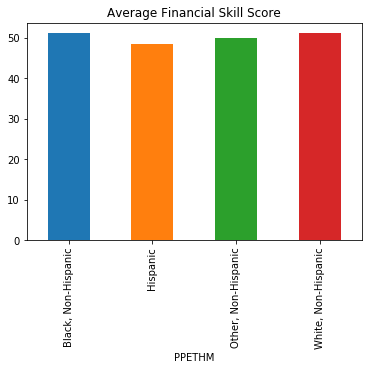

In [16]:
fs_score_eth['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

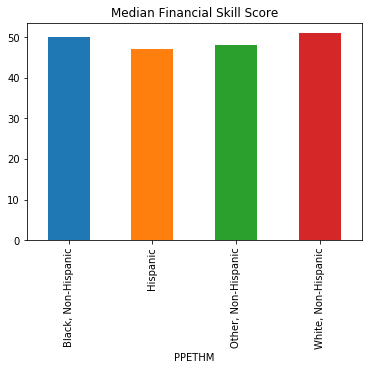

In [17]:
fs_score_eth['FSscore_median'].plot.bar(title='Median Financial Skill Score')

--- AGE ---

In [18]:
fs_score_age = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).sum()
fs_score_age['Participant_Count'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).count().rename(columns={'FSscore':'Participant_Count'})['Participant_Count']
fs_score_age['FSscore_avg'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).mean()
fs_score_age['FSscore_median'] = fin_lit_df.loc[:,['agecat','FSscore']].groupby(['agecat']).median()
fs_score_age

,FSscore,Participant_Count,FSscore_avg,FSscore_median
agecat,,,,
18-24,20419,414,49.321256,48
25-34,56148,1116,50.311828,49
35-44,41465,828,50.078502,48
45-54,53531,1075,49.796279,49
55-61,36127,708,51.026836,50
62-69,52989,1021,51.899119,51
70-74,25465,496,51.340726,51
75+,38154,736,51.839674,52


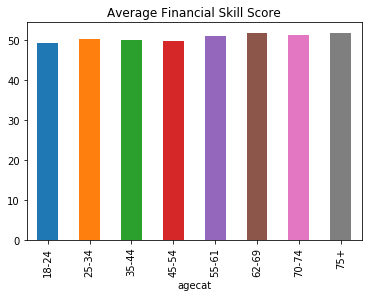

In [19]:
fs_score_age['FSscore_avg'].plot.bar(title='Average Financial Skill Score')

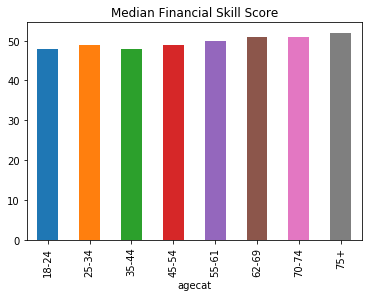

In [20]:
fs_score_age['FSscore_median'].plot.bar(title='Median Financial Skill Score')

#### Breakdown of Home Ownership by Demographic Information

In [223]:
homeown_cols = ['HOUSING','HOUSERANGES','MORTGAGE','PPREG4']
homeown_cols = demographic_cols + homeown_cols

In [224]:
homeown_df = filtered_df.loc[:,homeown_cols]
homeown_df = homeown_df.astype('int')
homeown_df = homeown_df.replace(value_map)
homeown_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,HOUSING,HOUSERANGES,MORTGAGE,PPREG4
0,10350,Male,"White, Non-Hispanic",75+,I own my home,4,"$50,000-199,999",West
1,7740,Male,"White, Non-Hispanic",35-44,I own my home,4,"$50,000-199,999",Midwest
2,13699,Male,"Black, Non-Hispanic",35-44,I own my home,3,"$50,000-199,999",West
3,7267,Male,"White, Non-Hispanic",35-44,Refused,99,Question not asked because respondent not in i...,South
4,7375,Male,"Other, Non-Hispanic",25-34,I rent,2,Question not asked because respondent not in i...,Midwest


--- GENDER ---

In [23]:
gender_totals = homeown_df.loc[:,['PUF_ID','PPGENDER']].groupby(['PPGENDER']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
gender_totals

,PPGENDER,Count_Total
0,Female,3042
1,Male,3352


In [24]:
homeown_gender = homeown_df.loc[:,['PUF_ID','PPGENDER','HOUSING']].groupby(['PPGENDER','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_gender = homeown_gender.merge(gender_totals)
homeown_gender['Gender_proportion'] = homeown_gender['Participant_Count'] / homeown_gender['Count_Total']
homeown_gender

,PPGENDER,HOUSING,Participant_Count,Count_Total,Gender_proportion
0,Female,I do not currently own or rent,262,3042,0.086128
1,Female,I own my home,1958,3042,0.643655
2,Female,I rent,799,3042,0.262656
3,Female,Refused,23,3042,0.007561
4,Male,I do not currently own or rent,283,3352,0.084427
5,Male,I own my home,2206,3352,0.658115
6,Male,I rent,844,3352,0.251790
7,Male,Refused,19,3352,0.005668


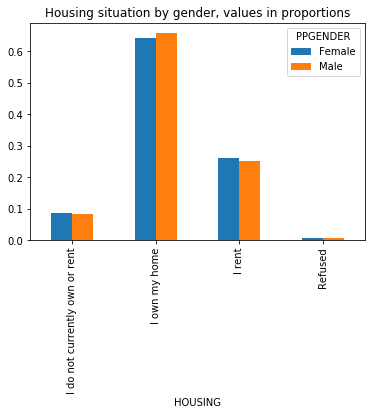

In [25]:
homeown_gender_pivot = homeown_gender.pivot(index='HOUSING',values='Gender_proportion',columns='PPGENDER')
homeown_gender_pivot.plot.bar(title='Housing situation by gender, values in proportions')

In [26]:
homeown_range_gender = homeown_df.loc[:,['PUF_ID','PPGENDER','HOUSERANGES']].groupby(['PPGENDER','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_gender = homeown_range_gender.merge(gender_totals)
homeown_range_gender['Gender_proportion'] = homeown_range_gender['Participant_Count'] / homeown_range_gender['Count_Total']
homeown_range_gender

,PPGENDER,HOUSERANGES,Participant_Count,Count_Total,Gender_proportion
0,Female,-1,41,3042,0.013478
1,Female,1,499,3042,0.164037
2,Female,2,226,3042,0.074293
3,Female,3,459,3042,0.150888
4,Female,4,403,3042,0.132479
5,Female,5,455,3042,0.149573
6,Female,6,232,3042,0.076266
7,Female,7,235,3042,0.077252
8,Female,98,129,3042,0.042406
9,Female,99,363,3042,0.119329


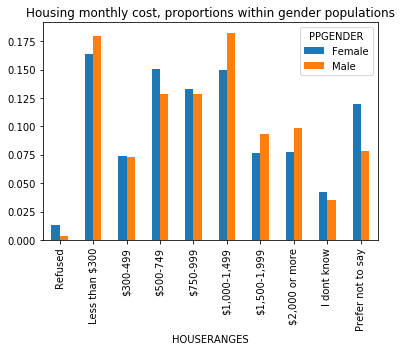

In [27]:
homeown_range_gender_pivot = homeown_range_gender.pivot(index='HOUSERANGES',values='Gender_proportion',columns='PPGENDER')
homeown_range_gender_pivot = homeown_range_gender_pivot.rename(index={
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    })
homeown_range_gender_pivot.plot.bar(title='Housing monthly cost, proportions within gender populations')

--- RACE/ETHNICITY ---

In [28]:
eth_totals = homeown_df.loc[:,['PUF_ID','PPETHM']].groupby(['PPETHM']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
eth_totals


,PPETHM,Count_Total
0,"Black, Non-Hispanic",685
1,Hispanic,875
2,"Other, Non-Hispanic",336
3,"White, Non-Hispanic",4498


In [29]:
homeown_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSING']].groupby(['PPETHM','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_eth = homeown_eth.merge(eth_totals)
homeown_eth['Ethnicity_proportion'] = homeown_eth['Participant_Count'] / homeown_eth['Count_Total']
homeown_eth

,PPETHM,HOUSING,Participant_Count,Count_Total,Ethnicity_proportion
0,"Black, Non-Hispanic",I do not currently own or rent,76,685,0.110949
1,"Black, Non-Hispanic",I own my home,308,685,0.449635
2,"Black, Non-Hispanic",I rent,296,685,0.432117
3,"Black, Non-Hispanic",Refused,5,685,0.007299
4,Hispanic,I do not currently own or rent,101,875,0.115429
5,Hispanic,I own my home,396,875,0.452571
6,Hispanic,I rent,372,875,0.425143
7,Hispanic,Refused,6,875,0.006857
8,"Other, Non-Hispanic",I do not currently own or rent,41,336,0.122024
9,"Other, Non-Hispanic",I own my home,185,336,0.550595


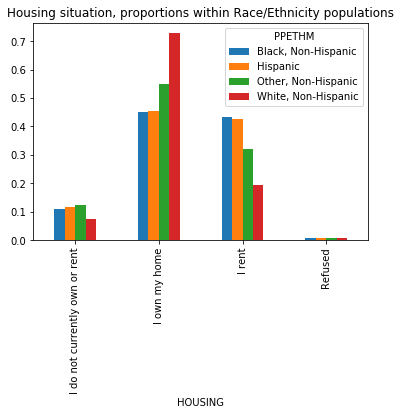

In [30]:
homeown_eth_pivot = homeown_eth.pivot(index='HOUSING',values='Ethnicity_proportion',columns='PPETHM')
homeown_eth_pivot.plot.bar(title='Housing situation, proportions within Race/Ethnicity populations')

In [31]:
homeown_range_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSERANGES']].groupby(['PPETHM','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_eth = homeown_range_eth.merge(eth_totals)
homeown_range_eth['Ethnicity_proportion'] = homeown_range_eth['Participant_Count'] / homeown_range_eth['Count_Total']
homeown_range_eth

,PPETHM,HOUSERANGES,Participant_Count,Count_Total,Ethnicity_proportion
0,"Black, Non-Hispanic",-1,6,685,0.008759
1,"Black, Non-Hispanic",1,75,685,0.109489
2,"Black, Non-Hispanic",2,51,685,0.074453
3,"Black, Non-Hispanic",3,143,685,0.208759
4,"Black, Non-Hispanic",4,112,685,0.163504
5,"Black, Non-Hispanic",5,92,685,0.134307
6,"Black, Non-Hispanic",6,46,685,0.067153
7,"Black, Non-Hispanic",7,52,685,0.075912
8,"Black, Non-Hispanic",98,27,685,0.039416
9,"Black, Non-Hispanic",99,81,685,0.118248


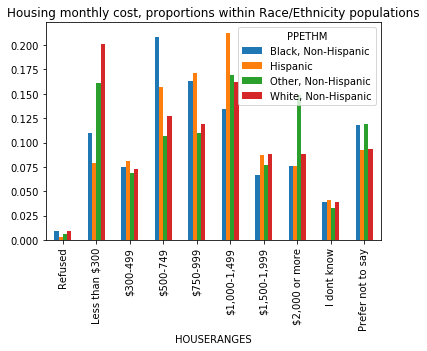

In [32]:
homeown_range_eth_pivot = homeown_range_eth.pivot(index='HOUSERANGES',values='Ethnicity_proportion',columns='PPETHM')
homeown_range_eth_pivot = homeown_range_eth_pivot.rename(index={
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
})
homeown_range_eth_pivot.plot.bar(title='Housing monthly cost, proportions within Race/Ethnicity populations')

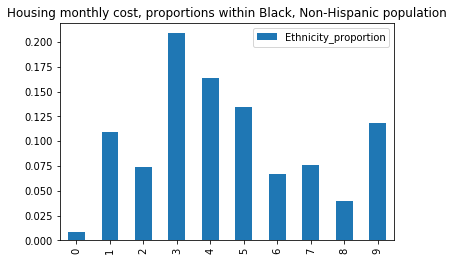

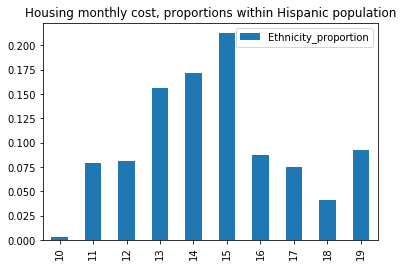

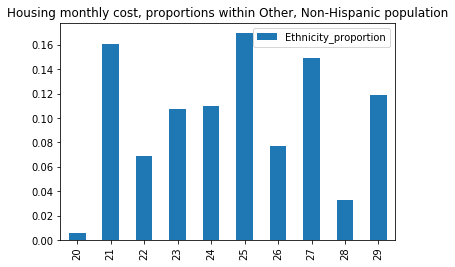

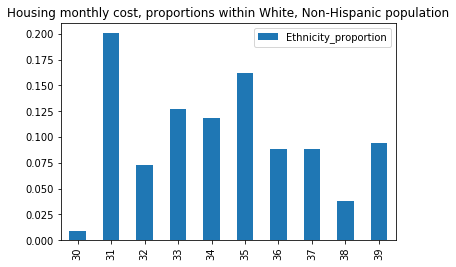

In [33]:
eth_vals = homeown_eth['PPETHM'].unique()
for g in eth_vals:
    homeown_range_eth[homeown_range_eth['PPETHM'] == g].loc[:,['Ethnicity_proportion']].plot.bar(title='Housing monthly cost, proportions within %s population' % (g))


#### Looking into regions further

In [226]:
# Incorporate region PPREG4 and compare to how much folks pay for housing (give insight into cost of living)
# Looking into Home Owners and Renters, and patterns within the two categories

In [227]:
homeown_range_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSERANGES','PPREG4']].groupby(['PPETHM','HOUSERANGES','PPREG4']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_eth = homeown_range_eth.merge(eth_totals)
homeown_range_eth['Ethnicity_proportion'] = homeown_range_eth['Participant_Count'] / homeown_range_eth['Count_Total']
homeown_range_eth

,PPETHM,HOUSERANGES,PPREG4,Participant_Count,Count_Total,Ethnicity_proportion
0,"Black, Non-Hispanic",-1,Midwest,2,685,0.002920
1,"Black, Non-Hispanic",-1,South,4,685,0.005839
2,"Black, Non-Hispanic",1,Midwest,18,685,0.026277
3,"Black, Non-Hispanic",1,Northeast,14,685,0.020438
4,"Black, Non-Hispanic",1,South,40,685,0.058394
5,"Black, Non-Hispanic",1,West,3,685,0.004380
6,"Black, Non-Hispanic",2,Midwest,16,685,0.023358
7,"Black, Non-Hispanic",2,Northeast,8,685,0.011679
8,"Black, Non-Hispanic",2,South,26,685,0.037956
9,"Black, Non-Hispanic",2,West,1,685,0.001460


In [228]:
homeown_range_eth = homeown_df.loc[:,['PUF_ID','PPETHM','HOUSERANGES','PPREG4']].groupby(['PPETHM','HOUSERANGES','PPREG4']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_eth = homeown_range_eth.merge(eth_totals)
homeown_range_eth['Ethnicity_proportion'] = homeown_range_eth['Participant_Count'] / homeown_range_eth['Count_Total']
homeown_range_eth

,PPETHM,HOUSERANGES,PPREG4,Participant_Count,Count_Total,Ethnicity_proportion
0,"Black, Non-Hispanic",-1,Midwest,2,685,0.002920
1,"Black, Non-Hispanic",-1,South,4,685,0.005839
2,"Black, Non-Hispanic",1,Midwest,18,685,0.026277
3,"Black, Non-Hispanic",1,Northeast,14,685,0.020438
4,"Black, Non-Hispanic",1,South,40,685,0.058394
5,"Black, Non-Hispanic",1,West,3,685,0.004380
6,"Black, Non-Hispanic",2,Midwest,16,685,0.023358
7,"Black, Non-Hispanic",2,Northeast,8,685,0.011679
8,"Black, Non-Hispanic",2,South,26,685,0.037956
9,"Black, Non-Hispanic",2,West,1,685,0.001460


In [229]:
homeown_range_eth_pivot

PPETHM                       Black, Non-Hispanic  Hispanic  \
PPREG4    HOUSERANGES                                        
Midwest   Refused                       0.002920  0.001143   
          Less than $300                0.026277  0.006857   
          $300-499                      0.023358  0.006857   
          $500-749                      0.039416  0.018286   
          $750-999                      0.023358  0.012571   
          $1,000-1,499                  0.018978  0.012571   
          $1,500-1,999                  0.004380  0.005714   
          $2,000 or more                0.011679  0.003429   
          I dont know                   0.008759  0.002286   
          Prefer not to say             0.021898  0.013714   
Northeast Refused                            NaN       NaN   
          Less than $300                0.020438  0.008000   
          $300-499                      0.011679  0.012571   
          $500-749                      0.033577  0.018286   
          $750-999                      0.029197  0.021714   
          $1,000-1,499                  0.023358  0.030857   
          $1,500-1,999                  0.008759  0.014857   
          $2,000 or more                0.020438  0.017143   
          I dont know                   0.007299  0.002286   
          Prefer not to say             0.023358  0.009143   
South     Refused                       0.005839  0.002286   
          Less than $300                0.058394  0.030857   
          $300-499                      0.037956  0.036571   
          $500-749                      0.124088  0.073143   
          $750-999                      0.091971  0.066286   
          $1,000-1,499                  0.068613  0.068571   
          $1,500-1,999                  0.030657  0.020571   
          $2,000 or more                0.030657  0.021714   
          I dont know                   0.021898  0.024000   
          Prefer not to say             0.070073  0.049143   
West      Refused                            NaN       NaN   
          Less than $300                0.004380  0.033143   
          $300-499                      0.001460  0.025143   
          $500-749                      0.011679  0.046857   
          $750-999                      0.018978  0.070857   
          $1,000-1,499                  0.023358  0.100571   
          $1,500-1,999                  0.023358  0.045714   
          $2,000 or more                0.013139  0.033143   
          I dont know                   0.001460  0.012571   
          Prefer not to say             0.002920  0.020571   

PPETHM                       Other, Non-Hispanic  White, Non-Hispanic  
PPREG4    HOUSERANGES                                                  
Midwest   Refused                            NaN             0.003335  
          Less than $300                0.038690             0.056470  
          $300-499                      0.026786             0.024455  
          $500-749                      0.014881             0.042908  
          $750-999                      0.011905             0.037795  
          $1,000-1,499                  0.014881             0.037350  
          $1,500-1,999                  0.005952             0.017563  
          $2,000 or more                0.005952             0.014006  
          I dont know                   0.002976             0.014006  
          Prefer not to say             0.011905             0.023121  
Northeast Refused                       0.002976             0.001779  
          Less than $300                0.005952             0.034015  
          $300-499                      0.008929             0.013117  
          $500-749                      0.008929             0.022454  
          $750-999                      0.029762             0.022010  
          $1,000-1,499                  0.026786             0.033570  
          $1,500-1,999                  0.008929             0.019120  
          $2,000 or more   

In [230]:
homeown_range_eth_pivot_ri = homeown_range_eth_pivot.reset_index()
homeown_range_eth_pivot_ri

PPETHM,PPREG4,HOUSERANGES,"Black, Non-Hispanic",Hispanic,"Other, Non-Hispanic","White, Non-Hispanic"
0,Midwest,Refused,0.002920,0.001143,NaN,0.003335
1,Midwest,Less than $300,0.026277,0.006857,0.038690,0.056470
2,Midwest,$300-499,0.023358,0.006857,0.026786,0.024455
3,Midwest,$500-749,0.039416,0.018286,0.014881,0.042908
4,Midwest,$750-999,0.023358,0.012571,0.011905,0.037795
5,Midwest,"$1,000-1,499",0.018978,0.012571,0.014881,0.037350
6,Midwest,"$1,500-1,999",0.004380,0.005714,0.005952,0.017563
7,Midwest,"$2,000 or more",0.011679,0.003429,0.005952,0.014006
8,Midwest,I dont know,0.008759,0.002286,0.002976,0.014006
9,Midwest,Prefer not to say,0.021898,0.013714,0.011905,0.023121


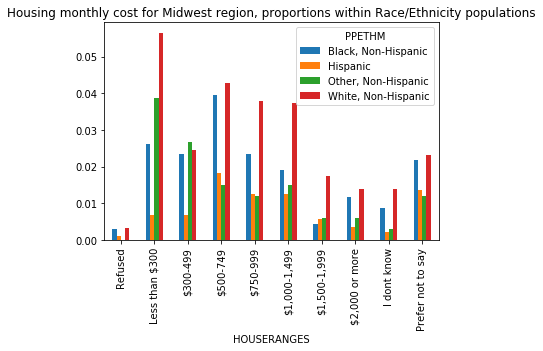

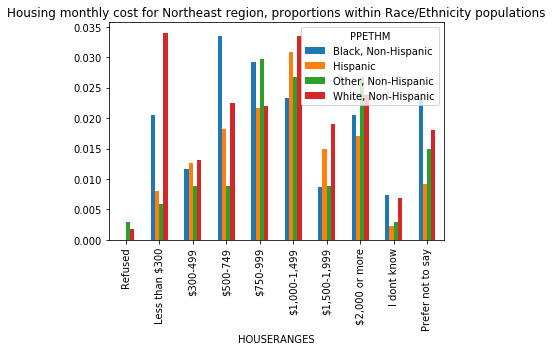

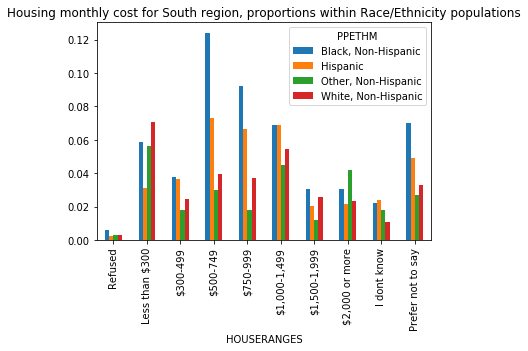

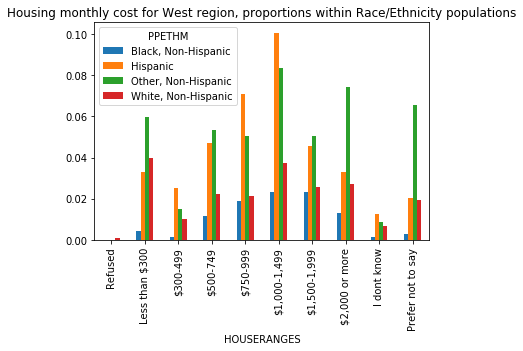

In [231]:
regions = homeown_range_eth_pivot_ri['PPREG4'].unique()
for r in regions:
    homeown_range_eth_pivot_ri[homeown_range_eth_pivot_ri['PPREG4']==r].drop(columns=['PPREG4']).set_index('HOUSERANGES').plot.bar(title='Housing monthly cost for %s region, proportions within Race/Ethnicity populations' % r)
    

In [232]:
# Compare to overall population, without breakdown per race/ethnicity; note any differences
homeown_range_region = homeown_range_eth.groupby(['PPREG4','HOUSERANGES']).sum().rename(columns={'Ethnicity_proportion':'Proportion'}).reset_index()
homeown_range_region

,PPREG4,HOUSERANGES,Participant_Count,Count_Total,Proportion
0,Midwest,-1,18,6058,0.007397
1,Midwest,1,291,6394,0.128295
2,Midwest,2,141,6394,0.081456
3,Midwest,3,241,6394,0.115491
4,Midwest,4,201,6394,0.085628
5,Midwest,5,197,6394,0.083780
6,Midwest,6,89,6394,0.033610
7,Midwest,7,76,6394,0.035066
8,Midwest,98,72,6394,0.028027
9,Midwest,99,135,6394,0.070638


In [233]:
homeown_range_region_pivot = homeown_range_region.pivot(index='PPREG4',values='Proportion',columns='HOUSERANGES')
homeown_range_region_pivot = homeown_range_region_pivot.rename(columns={
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
})
homeown_range_region_pivot

HOUSERANGES,Refused,Less than $300,$300-499,$500-749,$750-999,"$1,000-1,499","$1,500-1,999","$2,000 or more",I dont know,Prefer not to say
PPREG4,,,,,,,,,,
Midwest,0.007397,0.128295,0.081456,0.115491,0.085628,0.083780,0.033610,0.035066,0.028027,0.070638
Northeast,0.004755,0.068405,0.046296,0.083245,0.102683,0.114571,0.051664,0.088155,0.019453,0.065389
South,0.014214,0.216275,0.117062,0.266788,0.213464,0.236296,0.088922,0.117382,0.074649,0.179127
West,0.001112,0.136842,0.051710,0.134340,0.161996,0.244390,0.145456,0.147809,0.029629,0.108532


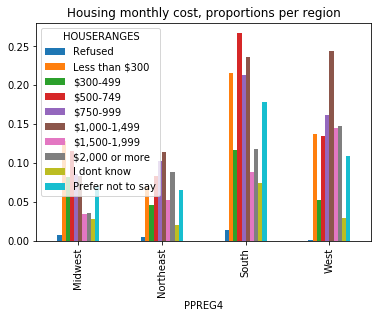

In [234]:
homeown_range_region_pivot.plot.bar(title='Housing monthly cost, proportions per region')

--- AGE ---

In [34]:
age_totals = homeown_df.loc[:,['PUF_ID','agecat']].groupby(['agecat']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
age_totals

,agecat,Count_Total
0,18-24,414
1,25-34,1116
2,35-44,828
3,45-54,1075
4,55-61,708
5,62-69,1021
6,70-74,496
7,75+,736


In [35]:
homeown_age = homeown_df.loc[:,['PUF_ID','agecat','HOUSING']].groupby(['agecat','HOUSING']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_age = homeown_age.merge(age_totals)
homeown_age['Age_proportion'] = homeown_age['Participant_Count'] / homeown_age['Count_Total']
homeown_age

,agecat,HOUSING,Participant_Count,Count_Total,Age_proportion
0,18-24,I do not currently own or rent,193,414,0.466184
1,18-24,I own my home,32,414,0.077295
2,18-24,I rent,184,414,0.444444
3,18-24,Refused,5,414,0.012077
4,25-34,I do not currently own or rent,173,1116,0.155018
5,25-34,I own my home,405,1116,0.362903
6,25-34,I rent,526,1116,0.471326
7,25-34,Refused,12,1116,0.010753
8,35-44,I do not currently own or rent,46,828,0.055556
9,35-44,I own my home,507,828,0.612319


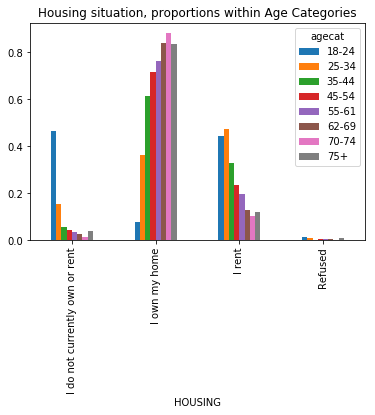

In [36]:
homeown_age_pivot = homeown_age.pivot(index='HOUSING',values='Age_proportion',columns='agecat')
homeown_age_pivot.plot.bar(title='Housing situation, proportions within Age Categories')

In [37]:
homeown_range_age = homeown_df.loc[:,['PUF_ID','agecat','HOUSERANGES']].groupby(['agecat','HOUSERANGES']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
homeown_range_age = homeown_range_age.merge(age_totals)
homeown_range_age['Age_proportion'] = homeown_range_age['Participant_Count'] / homeown_range_age['Count_Total']
homeown_range_age = homeown_range_age.replace({
    "HOUSERANGES":{
      -1: "Refused",
      1: "Less than $300",
      2: "$300-499",
      3: "$500-749",
      4: "$750-999",
      5: "$1,000-1,499",
      6: "$1,500-1,999",
      7: "$2,000 or more",
      98: "I dont know",
      99: "Prefer not to say"
    },})
homeown_range_age = homeown_range_age.set_index(['HOUSERANGES'])
homeown_range_age

,agecat,Participant_Count,Count_Total,Age_proportion
HOUSERANGES,,,,
Less than $300,18-24,52,414,0.125604
$300-499,18-24,49,414,0.118357
$500-749,18-24,98,414,0.236715
$750-999,18-24,56,414,0.135266
"$1,000-1,499",18-24,39,414,0.094203
"$1,500-1,999",18-24,12,414,0.028986
"$2,000 or more",18-24,15,414,0.036232
I dont know,18-24,67,414,0.161836
Prefer not to say,18-24,26,414,0.062802


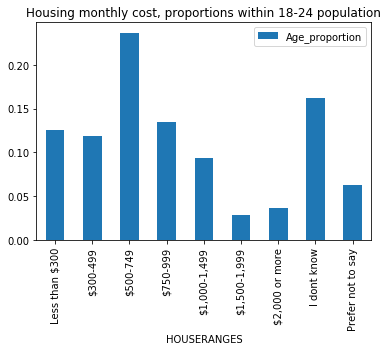

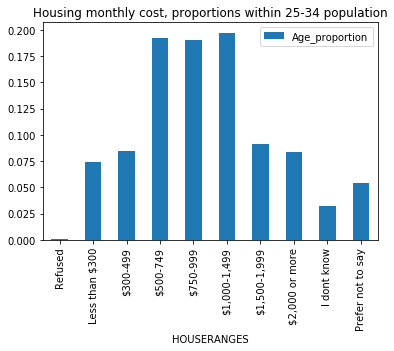

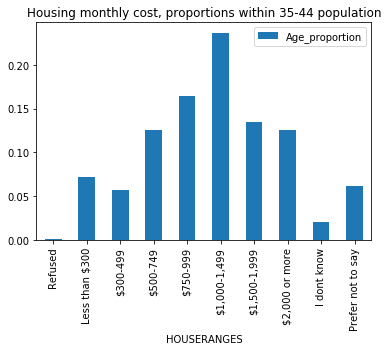

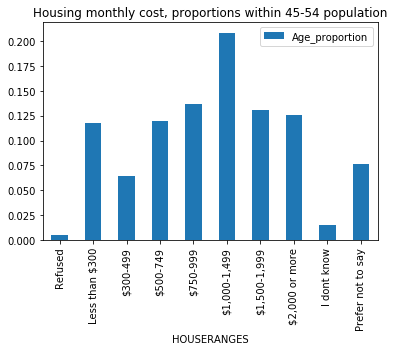

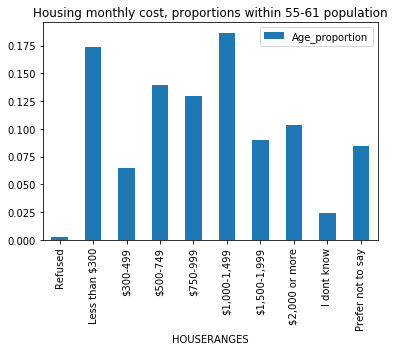

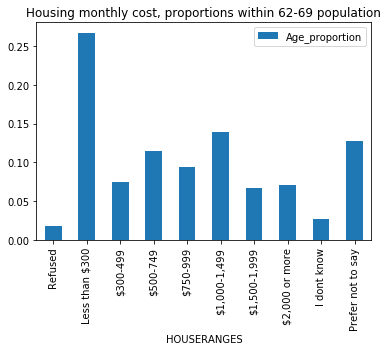

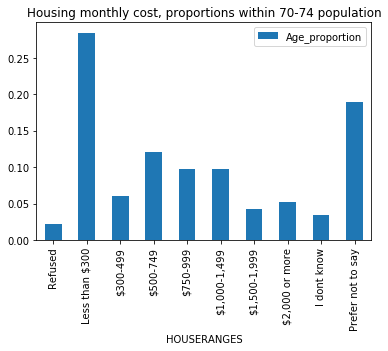

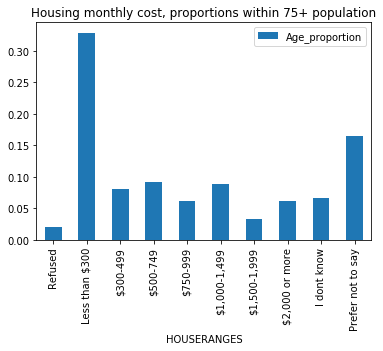

In [38]:
age_vals = homeown_age['agecat'].unique()
for g in age_vals:
    homeown_range_age[homeown_range_age['agecat'] == g].loc[:,['Age_proportion']].plot.bar(title='Housing monthly cost, proportions within %s population' % (g))


#### Breakdown of Debt-to-Income Ratio by Demographic Information

In [39]:
d_to_i_cols = ['PPINCIMP','PRODHAVE_8','PRODUSE_1','PRODUSE_2']
d_to_i_cols = demographic_cols + d_to_i_cols

In [40]:
income_df = filtered_df.loc[:,d_to_i_cols]
income_df = income_df.astype('int')
income_df = income_df.replace(value_map)
income_df.head()

,PUF_ID,PPGENDER,PPETHM,agecat,PPINCIMP,PRODHAVE_8,PRODUSE_1,PRODUSE_2
0,10350,Male,"White, Non-Hispanic",75+,7,No,No,No
1,7740,Male,"White, Non-Hispanic",35-44,6,No,No,No
2,13699,Male,"Black, Non-Hispanic",35-44,6,No,No,No
3,7267,Male,"White, Non-Hispanic",35-44,8,No,No,No
4,7375,Male,"Other, Non-Hispanic",25-34,7,No,No,Yes


--- GENDER ---

In [41]:
income_gender = income_df.loc[:,['PUF_ID','PPGENDER','PPINCIMP']].groupby(['PPGENDER','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_gender = income_gender.merge(gender_totals)
income_gender['Proportion'] = income_gender['Participant_Count'] / income_gender['Count_Total']
income_gender = income_gender.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_gender = income_gender.set_index(['PPINCIMP'])
income_gender

,PPGENDER,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than $20,000",Female,406,3042,0.133465
"$20,000 to $29,999",Female,282,3042,0.092702
"$30,000 to $39,999",Female,313,3042,0.102893
"$40,000 to $49,999",Female,231,3042,0.075937
"$50,000 to $59,999",Female,255,3042,0.083826
"$60,000 to $74,999",Female,293,3042,0.096318
"$75,000 to $99,999",Female,415,3042,0.136423
"$100,000 to $149,999",Female,483,3042,0.158777
"$150,000 or more",Female,364,3042,0.119658


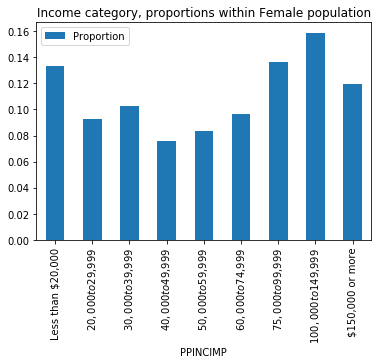

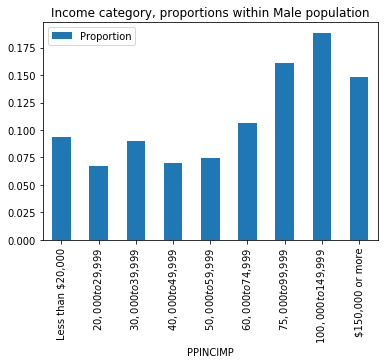

In [42]:
gender_vals = income_gender['PPGENDER'].unique()
for g in gender_vals:
    income_gender[income_gender['PPGENDER'] == g].loc[:,['Proportion']].plot.bar(title='Income category, proportions within %s population' % (g))


In [43]:
debt_gender = income_df.loc[:,['PUF_ID','PPGENDER','PRODUSE_1']].groupby(['PPGENDER','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_gender = debt_gender.merge(gender_totals)
debt_gender['Proportion'] = debt_gender['Participant_Count'] / debt_gender['Count_Total']
debt_gender = debt_gender.set_index(['PRODUSE_1'])
debt_gender

,PPGENDER,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,Female,2950,3042,0.969757
Yes,Female,92,3042,0.030243
No,Male,3271,3352,0.975835
Yes,Male,81,3352,0.024165


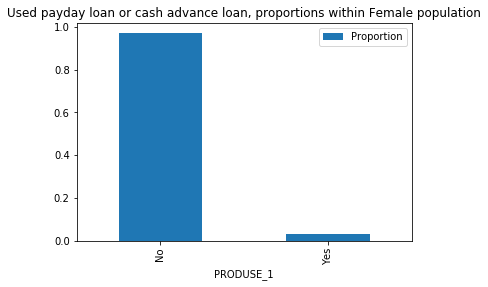

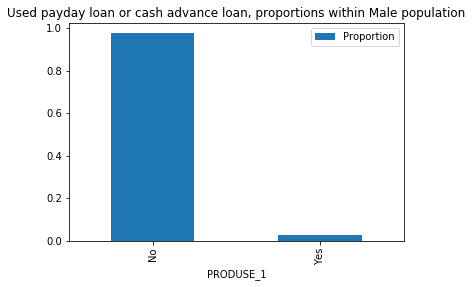

In [44]:
for g in gender_vals:
    debt_gender[debt_gender['PPGENDER'] == g].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (g))


--- RACE/ETHNICITY ---

In [45]:
income_eth = income_df.loc[:,['PUF_ID','PPETHM','PPINCIMP']].groupby(['PPETHM','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_eth = income_eth.merge(eth_totals)
income_eth['Proportion'] = income_eth['Participant_Count'] / income_eth['Count_Total']
income_eth = income_eth.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_eth = income_eth.set_index(['PPINCIMP'])
income_eth

,PPETHM,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than $20,000","Black, Non-Hispanic",164,685,0.239416
"$20,000 to $29,999","Black, Non-Hispanic",63,685,0.091971
"$30,000 to $39,999","Black, Non-Hispanic",74,685,0.108029
"$40,000 to $49,999","Black, Non-Hispanic",58,685,0.084672
"$50,000 to $59,999","Black, Non-Hispanic",53,685,0.077372
"$60,000 to $74,999","Black, Non-Hispanic",50,685,0.072993
"$75,000 to $99,999","Black, Non-Hispanic",83,685,0.121168
"$100,000 to $149,999","Black, Non-Hispanic",76,685,0.110949
"$150,000 or more","Black, Non-Hispanic",64,685,0.093431


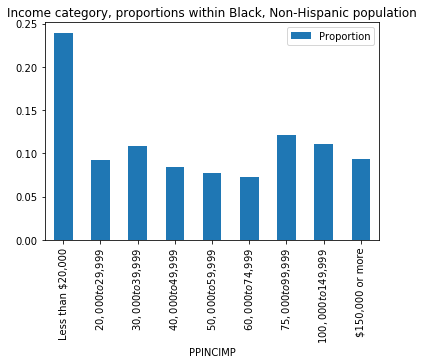

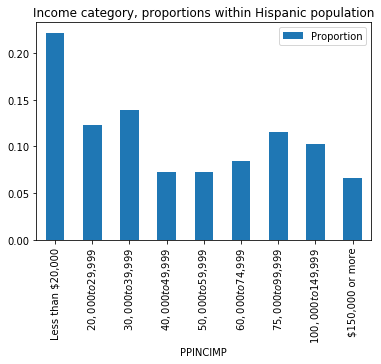

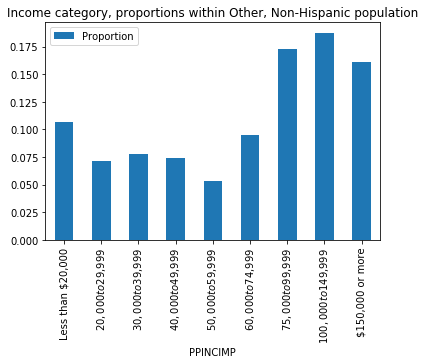

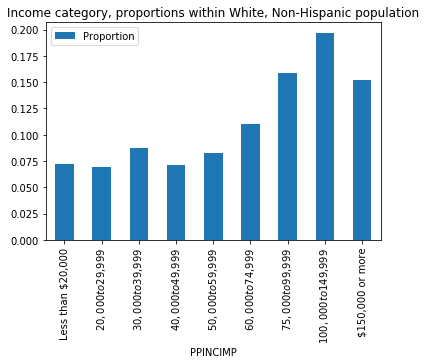

In [46]:
eth_vals = income_eth['PPETHM'].unique()
for g in eth_vals:
    income_eth[income_eth['PPETHM'] == g].loc[:,['Proportion']].plot.bar(title='Income category, proportions within %s population' % (g))


In [47]:
debt_eth = income_df.loc[:,['PUF_ID','PPETHM','PRODUSE_1']].groupby(['PPETHM','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_eth = debt_eth.merge(eth_totals)
debt_eth['Proportion'] = debt_eth['Participant_Count'] / debt_eth['Count_Total']
debt_eth = debt_eth.set_index(['PRODUSE_1'])
debt_eth

,PPETHM,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,"Black, Non-Hispanic",633,685,0.924088
Yes,"Black, Non-Hispanic",52,685,0.075912
No,Hispanic,836,875,0.955429
Yes,Hispanic,39,875,0.044571
No,"Other, Non-Hispanic",328,336,0.976190
Yes,"Other, Non-Hispanic",8,336,0.023810
No,"White, Non-Hispanic",4424,4498,0.983548
Yes,"White, Non-Hispanic",74,4498,0.016452


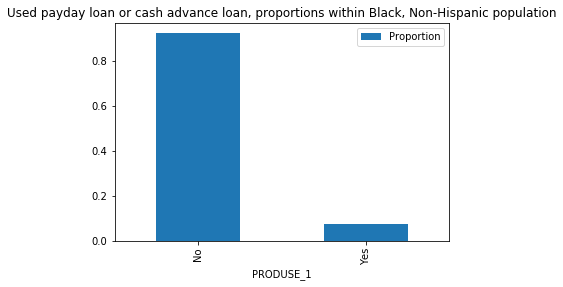

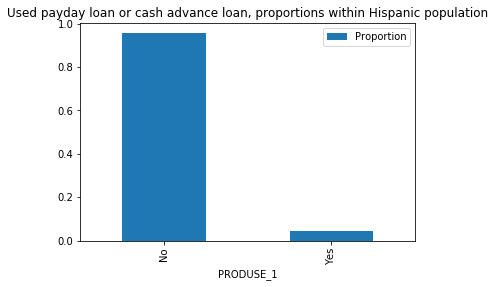

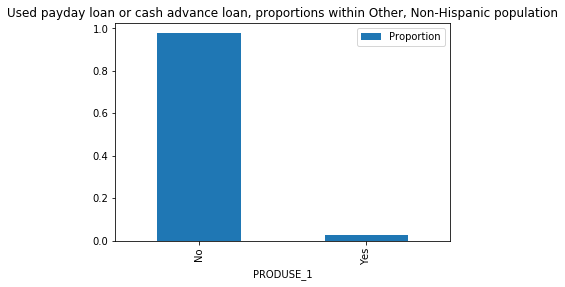

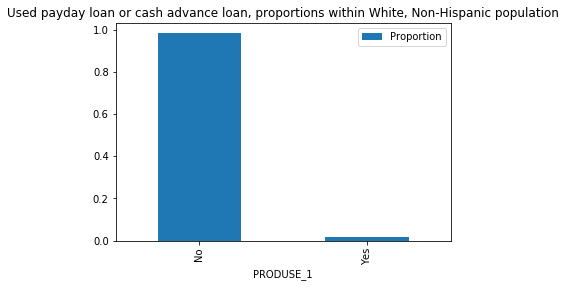

In [127]:
for g in eth_vals:
    debt_eth[debt_eth['PPETHM'] == g].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (g))


--- AGE ---

In [49]:
income_age = income_df.loc[:,['PUF_ID','agecat','PPINCIMP']].groupby(['agecat','PPINCIMP']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
income_age = income_age.merge(age_totals)
income_age['Proportion'] = income_age['Participant_Count'] / income_age['Count_Total']
income_age = income_age.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
})
income_age = income_age.set_index(['PPINCIMP'])
income_age

,agecat,Participant_Count,Count_Total,Proportion
PPINCIMP,,,,
"Less than $20,000",18-24,83,414,0.200483
"$20,000 to $29,999",18-24,36,414,0.086957
"$30,000 to $39,999",18-24,36,414,0.086957
"$40,000 to $49,999",18-24,36,414,0.086957
"$50,000 to $59,999",18-24,30,414,0.072464
"$60,000 to $74,999",18-24,34,414,0.082126
"$75,000 to $99,999",18-24,45,414,0.108696
"$100,000 to $149,999",18-24,70,414,0.169082
"$150,000 or more",18-24,44,414,0.106280


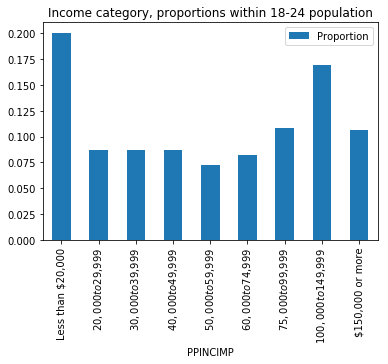

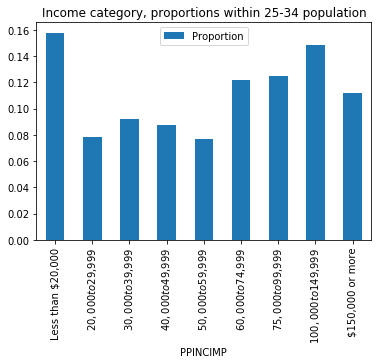

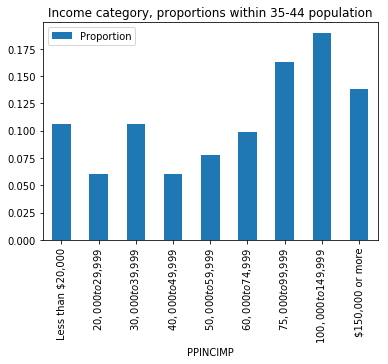

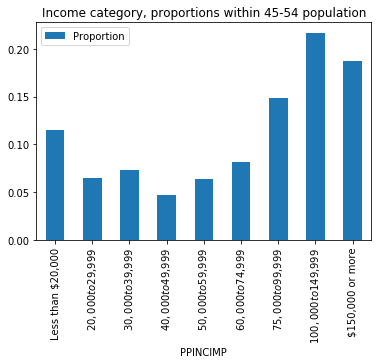

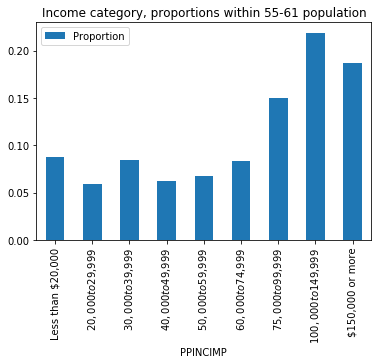

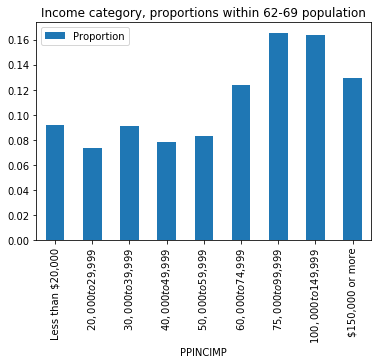

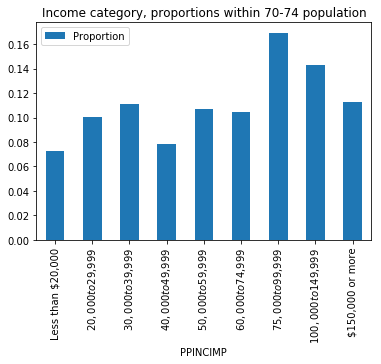

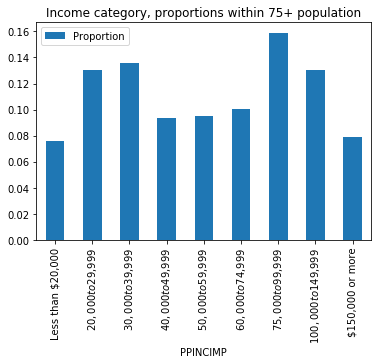

In [50]:
age_vals = income_age['agecat'].unique()
for g in age_vals:
    income_age[income_age['agecat'] == g].loc[:,['Proportion']].plot.bar(title='Income category, proportions within %s population' % (g))


In [51]:
debt_age = income_df.loc[:,['PUF_ID','agecat','PRODUSE_1']].groupby(['agecat','PRODUSE_1']).count().rename(columns={'PUF_ID':'Participant_Count'}).reset_index()
debt_age = debt_age.merge(age_totals)
debt_age['Proportion'] = debt_age['Participant_Count'] / debt_age['Count_Total']
debt_age = debt_age.set_index(['PRODUSE_1'])
debt_age

,agecat,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,18-24,404,414,0.975845
Yes,18-24,10,414,0.024155
No,25-34,1066,1116,0.955197
Yes,25-34,50,1116,0.044803
No,35-44,789,828,0.952899
Yes,35-44,39,828,0.047101
No,45-54,1047,1075,0.973953
Yes,45-54,28,1075,0.026047
No,55-61,689,708,0.973164


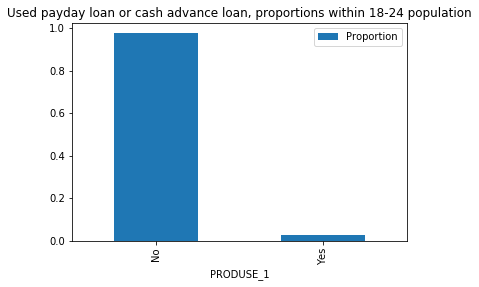

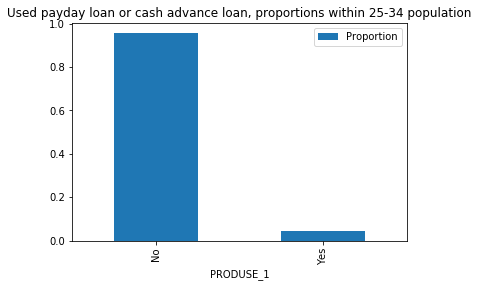

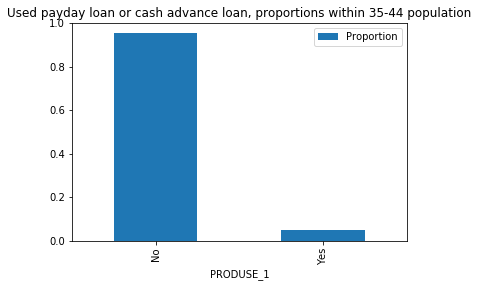

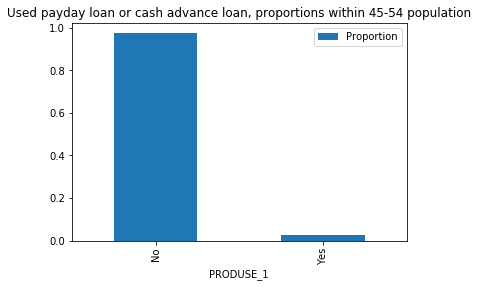

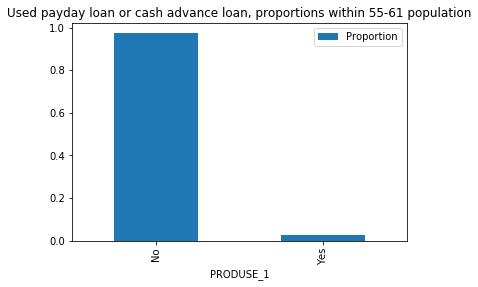

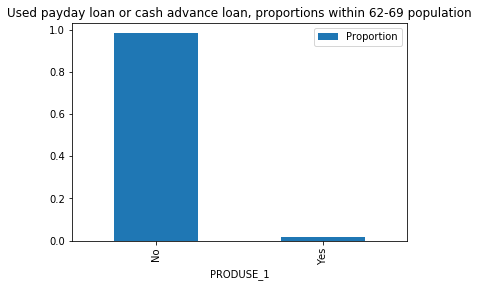

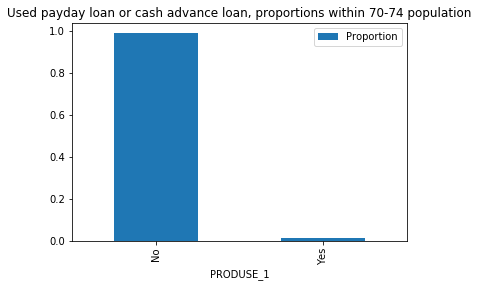

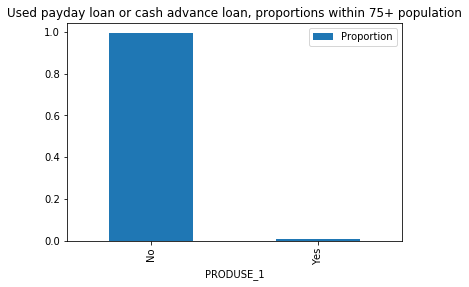

In [52]:
for g in age_vals:
    debt_age[debt_age['agecat'] == g].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (g))


---Pay Day Loans---

In [235]:
#Looking at different income categories and whether folks get cash advance/payday loans; find patterns

In [118]:
income_payday_totals = filtered_df.loc[:,['PUF_ID','PPINCIMP']].groupby(['PPINCIMP']).count().reset_index().rename(columns={'PUF_ID':'Count_Total'})
income_payday_totals

,PPINCIMP,Count_Total
0,1,719
1,2,506
2,3,614
3,4,467
4,5,505
5,6,651
6,7,955
7,8,1115
8,9,862


In [123]:
income_payday = filtered_df.loc[:,['PUF_ID','PRODUSE_1','PPINCIMP']].groupby(['PPINCIMP','PRODUSE_1']).count().rename(columns={'PUF_ID': 'Participant_Count'}).reset_index()
income_payday = income_payday.merge(income_payday_totals)
income_payday = income_payday.replace({
    "PPINCIMP":{
      1: "Less than $20,000",
      2: "$20,000 to $29,999",
      3: "$30,000 to $39,999",
      4: "$40,000 to $49,999",
      5: "$50,000 to $59,999",
      6: "$60,000 to $74,999",
      7: "$75,000 to $99,999",
      8: "$100,000 to $149,999",
      9: "$150,000 or more"
    },
    "PRODUSE_1":{
      0: "No",
      1: "Yes"
    },
})
income_payday['Proportion'] = income_payday['Participant_Count']/income_payday['Count_Total']
income_payday = income_payday.set_index(['PRODUSE_1'])
income_payday


,PPINCIMP,Participant_Count,Count_Total,Proportion
PRODUSE_1,,,,
No,"Less than $20,000",668,719,0.929068
Yes,"Less than $20,000",51,719,0.070932
No,"$20,000 to $29,999",490,506,0.968379
Yes,"$20,000 to $29,999",16,506,0.031621
No,"$30,000 to $39,999",587,614,0.956026
Yes,"$30,000 to $39,999",27,614,0.043974
No,"$40,000 to $49,999",448,467,0.959315
Yes,"$40,000 to $49,999",19,467,0.040685
No,"$50,000 to $59,999",490,505,0.970297


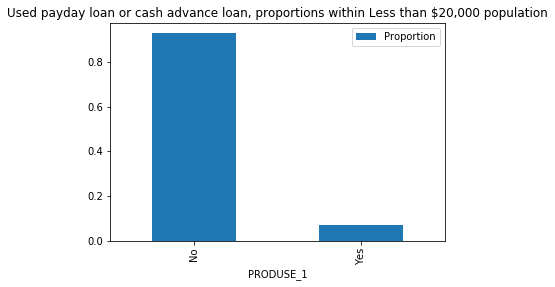

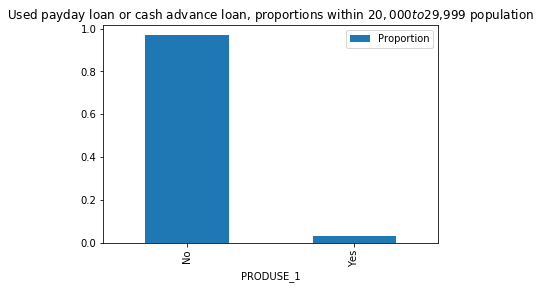

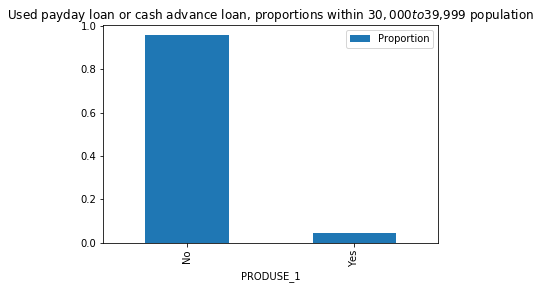

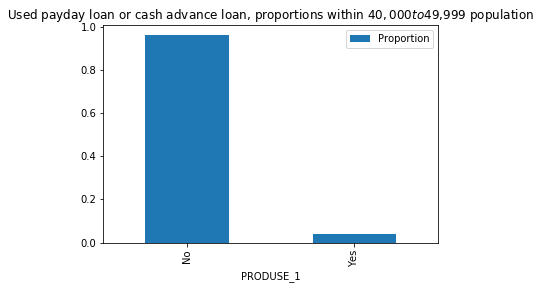

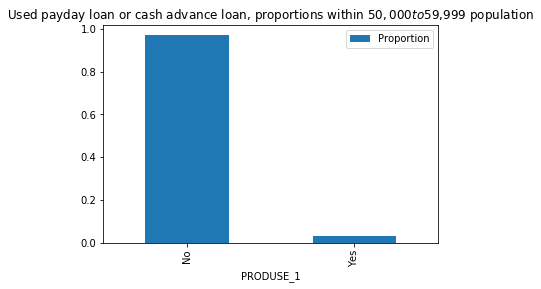

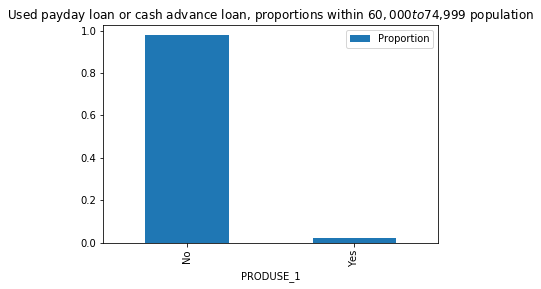

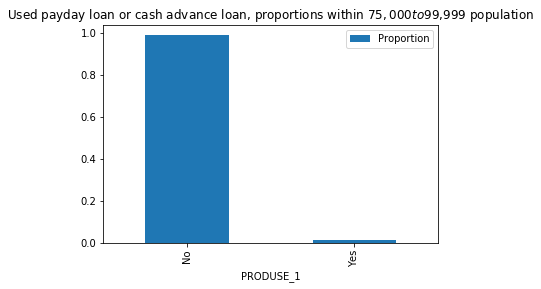

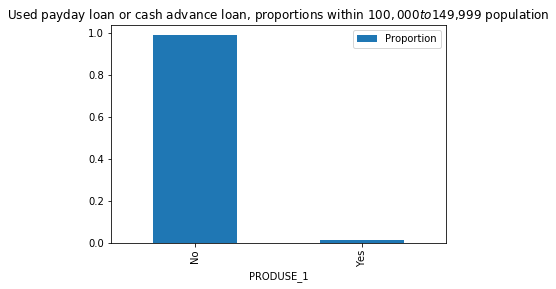

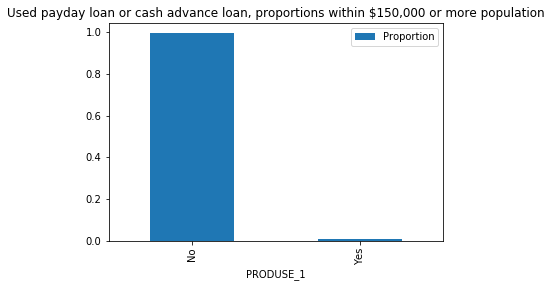

In [129]:
income_vals = income_payday['PPINCIMP'].unique()
for x in income_vals:
    income_payday[income_payday['PPINCIMP'] == x].loc[:,['Proportion']].plot.bar(title='Used payday loan or cash advance loan, proportions within %s population' % (x))

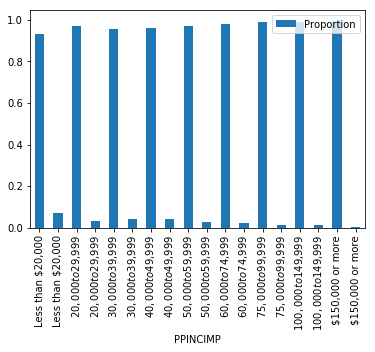

In [143]:
income_payday = income_payday.loc[:,['Proportion']].reset_index().set_index('PPINCIMP')
income_payday.plot.bar()

## Patterns between financial literacy and financial success metrics

#### Any correlation between financial literacy education and each of our financial success metrics?

In [66]:
mod_df = filtered_df.copy()
# mod_df = mod_df[mod_df['FSscore'] > 0]
# mod_df = mod_df[mod_df['HOUSING'] > 0]
# mod_df.loc[:,['FSscore','HOUSING']].plot.scatter(y='HOUSING',x='FSscore')

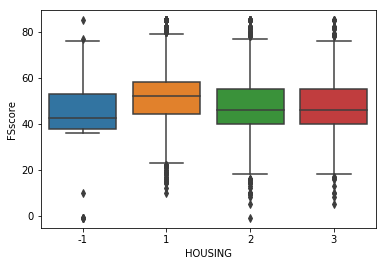

In [67]:
# For reference:
# "HOUSING":{
#   -1: "Refused",
#   1: "I own my home",
#   2: "I rent",
#   3: "I do not currently own or rent"
# },

from matplotlib import pyplot as plt
import seaborn as sns
plt.figure()
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df)

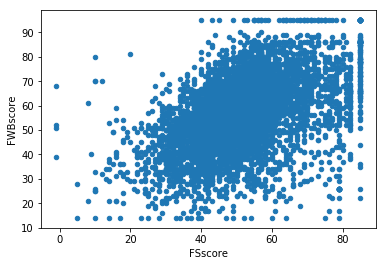

In [68]:
mod_df = mod_df[mod_df['FWBscore'] > 0]
mod_df.loc[:,['FSscore','FWBscore']].plot.scatter(y='FWBscore',x='FSscore')

In [236]:
np.corrcoef(mod_df['FSscore'],mod_df['FWBscore'])[0,1]

0.48995231916760146

#### Any differences among different demographics?

In [69]:
mod_df = mod_df.replace({
    "PPGENDER":{
      1: "Male",
      2: "Female"
    },
    "PPETHM":{
      1: "White, Non-Hispanic",
      2: "Black, Non-Hispanic",
      3: "Other, Non-Hispanic",
      4: "Hispanic"
    },
    "agecat":{
      1: "18-24",
      2: "25-34",
      3: "35-44",
      4: "45-54",
      5: "55-61",
      6: "62-69",
      7: "70-74",
      8: "75+"
    },
})

--- GENDER ---

Text(0.5,1,'Female Demographic')

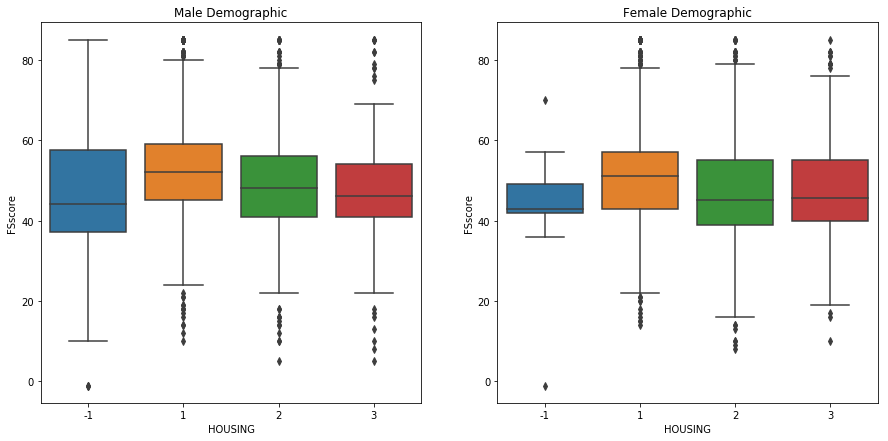

In [237]:
plt.figure(figsize=(15,7))
plt.subplot(121)
mod_df_male = mod_df[mod_df['PPGENDER']=='Male']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_male)
plt.title('Male Demographic')
plt.subplot(122)
mod_df_female = mod_df[mod_df['PPGENDER']=='Female']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_female)
plt.title('Female Demographic')

In [89]:
# from matplotlib import pyplot as plt
colors = {
    'Female':'green',
    'Male':'red'
}
# _, ax = plt.subplots()
# for key, group in mod_df.groupby('PPGENDER'):
#     group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
# ax.set_xlabel('Housing Situation')
# ax.set_ylabel('Financial Skill Score')
# _ = ax.set_title('Financial Skill and Housing Situation pattern')


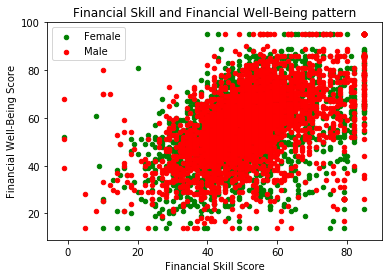

In [90]:
_, ax = plt.subplots()
for key, group in mod_df.groupby('PPGENDER'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being pattern')


In [238]:
male_df = mod_df[mod_df['PPGENDER'] == 'Male']
female_df = mod_df[mod_df['PPGENDER'] == 'Female']

In [239]:
# Male
np.corrcoef(male_df['FSscore'],male_df['FWBscore'])[0,1]

0.51315701161078275

In [240]:
# Female
np.corrcoef(female_df['FSscore'],female_df['FWBscore'])[0,1]

0.46046392327621177

In [90]:
male_df = mod_df[mod_df['PPGENDER'] == 'Male']
female_df = mod_df[mod_df['PPGENDER'] == 'Female']

In [91]:
# Male
np.corrcoef(male_df['FSscore'],male_df['FWBscore'])[0,1]

0.51315701161078275

In [92]:
# Female
np.corrcoef(female_df['FSscore'],female_df['FWBscore'])[0,1]

0.46046392327621177

--- RACE/ETHNICITY ---

In [241]:
# Looking into the folks that refused to answer certain questions and the trend/pattern to FSscore and FWBscore
# Correlation co-efficient per demographic group

Text(0.5,1,'Hispanic')

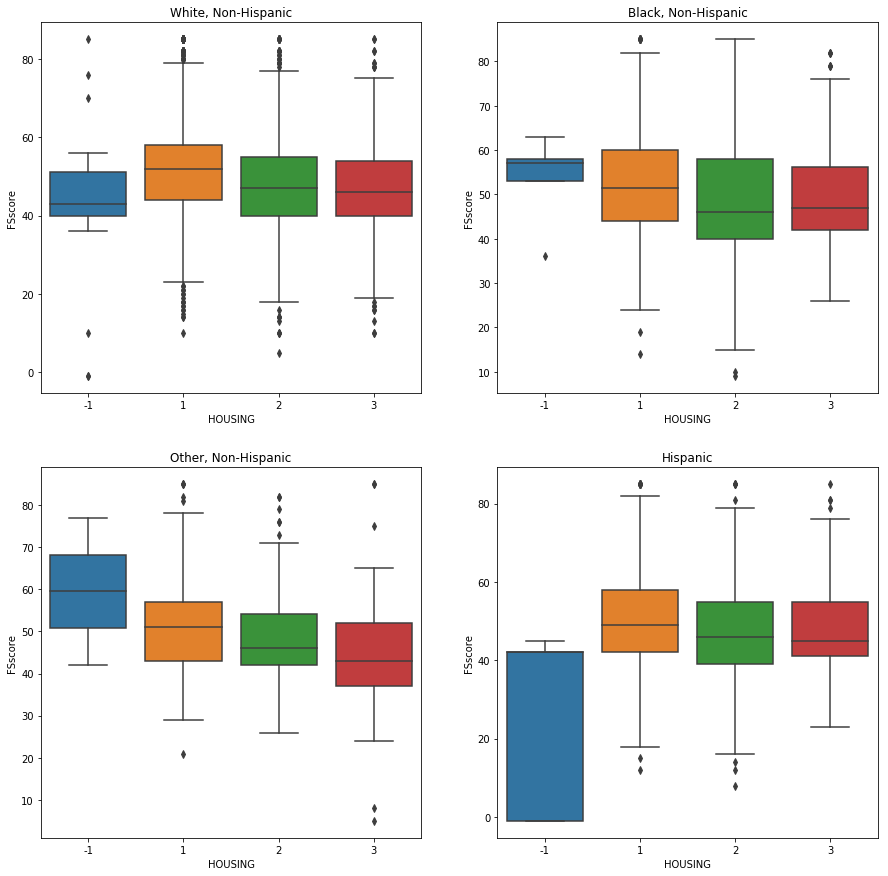

In [242]:
plt.figure(figsize=(15,15))

plt.subplot(221)
mod_df_white = mod_df[mod_df['PPETHM']=='White, Non-Hispanic']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_white)
plt.title('White, Non-Hispanic')

plt.subplot(222)
mod_df_black = mod_df[mod_df['PPETHM']=='Black, Non-Hispanic']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_black)
plt.title('Black, Non-Hispanic')

plt.subplot(223)
mod_df_other = mod_df[mod_df['PPETHM']=='Other, Non-Hispanic']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_other)
plt.title('Other, Non-Hispanic')

plt.subplot(224)
mod_df_hispanic = mod_df[mod_df['PPETHM']=='Hispanic']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_hispanic)
plt.title('Hispanic')

In [100]:
colors = {
    "White, Non-Hispanic":"red",
    "Black, Non-Hispanic":"blue",
    "Other, Non-Hispanic":"green",
    "Hispanic":"purple"
}
# _, ax = plt.subplots()
# for key, group in mod_df.groupby('PPETHM'):
#     group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
# ax.set_xlabel('Housing Situation')
# ax.set_ylabel('Financial Skill Score')
# _ = ax.set_title('Financial Skill and Housing Situation pattern')


In [101]:
# _, ax = plt.subplots()
# for key, group in mod_df[mod_df['PPETHM'] != 'White, Non-Hispanic'].groupby('PPETHM'):
#     group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
# ax.set_xlabel('Housing Situation')
# ax.set_ylabel('Financial Skill Score')
# _ = ax.set_title('Financial Skill and Housing Situation pattern')


In [102]:
# _, ax = plt.subplots()
# for key, group in mod_df[mod_df['PPETHM'] == 'Black, Non-Hispanic'].groupby('PPETHM'):
#     group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
# ax.set_xlabel('Housing Situation')
# ax.set_ylabel('Financial Skill Score')
# _ = ax.set_title('Financial Skill and Housing Situation pattern')


In [103]:
# _, ax = plt.subplots()
# for key, group in mod_df[mod_df['PPETHM'] == 'Hispanic'].groupby('PPETHM'):
#     group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
# ax.set_xlabel('Housing Situation')
# ax.set_ylabel('Financial Skill Score')
# _ = ax.set_title('Financial Skill and Housing Situation pattern')


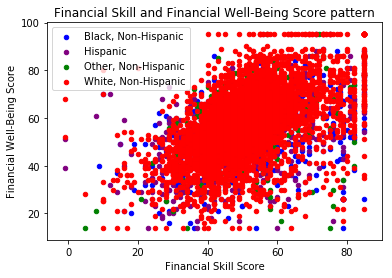

In [104]:
_, ax = plt.subplots()
for key, group in mod_df.groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being Score pattern')


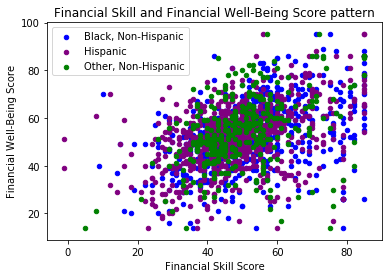

In [105]:
_, ax = plt.subplots()
for key, group in mod_df[mod_df['PPETHM'] != 'White, Non-Hispanic'].groupby('PPETHM'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being Score pattern')


In [243]:
white_temp = mod_df[mod_df['PPETHM'] == 'White, Non-Hispanic']
hispanic_temp = mod_df[mod_df['PPETHM'] == 'Hispanic']
black_temp = mod_df[mod_df['PPETHM'] == 'Black, Non-Hispanic']
other_temp = mod_df[mod_df['PPETHM'] == 'Other, Non-Hispanic']

In [244]:
# White
np.corrcoef(white_temp['FSscore'],white_temp['FWBscore'])[0,1]

0.52105257104754621

In [245]:
# Hispanic
np.corrcoef(hispanic_temp['FSscore'],hispanic_temp['FWBscore'])[0,1]

0.43654035426238469

In [246]:
# Black
np.corrcoef(black_temp['FSscore'],black_temp['FWBscore'])[0,1]

0.40352802584664776

In [247]:
# Other
np.corrcoef(other_temp['FSscore'],other_temp['FWBscore'])[0,1]

0.40783377765386963

--- AGE ---

Text(0.5,1,'75+ Age Category')

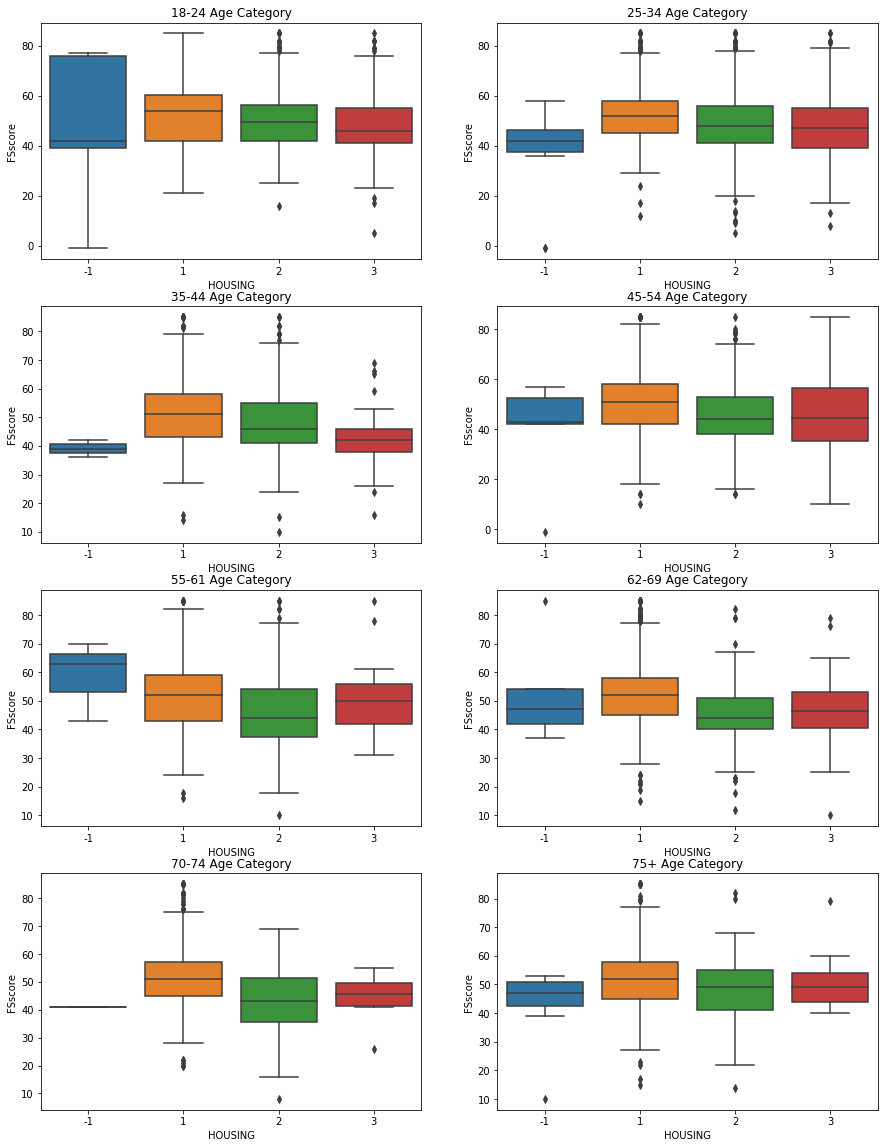

In [248]:
plt.figure(figsize=(15,20))

plt.subplot(421)
mod_df_18_24 = mod_df[mod_df['agecat']=='18-24']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_18_24)
plt.title('18-24 Age Category')

plt.subplot(422)
mod_df_25_34 = mod_df[mod_df['agecat']=='25-34']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_25_34)
plt.title('25-34 Age Category')

plt.subplot(423)
mod_df_35_44 = mod_df[mod_df['agecat']=='35-44']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_35_44)
plt.title('35-44 Age Category')

plt.subplot(424)
mod_df_45_54 = mod_df[mod_df['agecat']=='45-54']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_45_54)
plt.title('45-54 Age Category')

plt.subplot(425)
mod_df_55_61 = mod_df[mod_df['agecat']=='55-61']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_55_61)
plt.title('55-61 Age Category')

plt.subplot(426)
mod_df_62_69 = mod_df[mod_df['agecat']=='62-69']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_62_69)
plt.title('62-69 Age Category')

plt.subplot(427)
mod_df_70_74 = mod_df[mod_df['agecat']=='70-74']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_70_74)
plt.title('70-74 Age Category')

plt.subplot(428)
mod_df_75 = mod_df[mod_df['agecat']=='75+']
sns.boxplot(x='HOUSING',y='FSscore',data=mod_df_75)
plt.title('75+ Age Category')

In [249]:
colors = {
    "18-24":'red',
    "25-34":'blue',
    "35-44":'purple',
    "45-54":'green',
    "55-61":'pink',
    "62-69":'grey',
    "70-74":'black',
    "75+":'yellow'
}
# _, ax = plt.subplots()
# for key, group in mod_df.groupby('agecat'):
#     group.plot.scatter(ax=ax, y='HOUSING',x='FSscore',label=key,color=colors[key])
# ax.set_xlabel('Housing Situation')
# ax.set_ylabel('Financial Skill Score')
# _ = ax.set_title('Financial Skill and Housing Situation pattern')


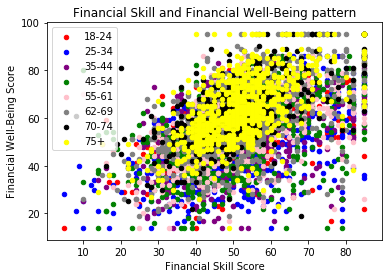

In [498]:
_, ax = plt.subplots()
for key, group in mod_df.groupby('agecat'):
    group.plot.scatter(ax=ax, y='FWBscore',x='FSscore',label=key,color=colors[key])
ax.set_ylabel('Financial Well-Being Score')
ax.set_xlabel('Financial Skill Score')
_ = ax.set_title('Financial Skill and Financial Well-Being pattern')


In [250]:
temp18 = mod_df[mod_df['agecat'] == '18-24']
temp25 = mod_df[mod_df['agecat'] == '25-34']
temp35 = mod_df[mod_df['agecat'] == '35-44']
temp45 = mod_df[mod_df['agecat'] == '45-54']
temp55 = mod_df[mod_df['agecat'] == '55-61']
temp62 = mod_df[mod_df['agecat'] == '62-69']
temp70 = mod_df[mod_df['agecat'] == '70-74']
temp75 = mod_df[mod_df['agecat'] == '75+']

In [251]:
# 18-24 age group
np.corrcoef(temp18['FSscore'],temp18['FWBscore'])[0,1]

0.33895214705756932

In [252]:
# 25-34 age group
np.corrcoef(temp25['FSscore'],temp25['FWBscore'])[0,1]

0.46378390082819754

In [253]:
# 35-44 age group
np.corrcoef(temp35['FSscore'],temp35['FWBscore'])[0,1]

0.43857731259195398

In [254]:
# 45-54 age group
np.corrcoef(temp45['FSscore'],temp45['FWBscore'])[0,1]

0.484191073922497

In [255]:
# 55-61 age group
np.corrcoef(temp55['FSscore'],temp55['FWBscore'])[0,1]

0.50641780827954708

In [256]:
# 62-69 age group
np.corrcoef(temp62['FSscore'],temp62['FWBscore'])[0,1]

0.59264633143715084

In [257]:
# 70-74 age group
np.corrcoef(temp70['FSscore'],temp70['FWBscore'])[0,1]

0.59659518914276

In [258]:
# 75+ age group
np.corrcoef(temp75['FSscore'],temp75['FWBscore'])[0,1]

0.54752219193601148

## Other Correlations

In [259]:
corr = filtered_df.corr()

In [260]:
pos_cor_fwb = corr['FWBscore'] > 0
neg_cor_fwb = corr['FWBscore'] < 0

In [261]:
corr['FWBscore'][pos_cor_fwb].sort_values(ascending=False)

FWBscore         1.000000
FWB1_1           0.702372
MANAGE1_3        0.515920
ACT1_2           0.515036
FSscore          0.494661
SAVEHABIT        0.492941
MANAGE1_2        0.431222
MANAGE1_1        0.419133
PPINCIMP         0.382696
SUBKNOWL1        0.365188
fpl              0.338120
agecat           0.318407
PPEDUC           0.251740
PROPPLAN_3       0.249078
MORTGAGE         0.081917
SAVINGSRANGES    0.077030
PPREG4           0.027552
PPREG9           0.021479
PUF_ID           0.019490
HOUSERANGES      0.011878
PROPPLAN_1       0.011142
Name: FWBscore, dtype: float64

In [262]:
corr['FWBscore'][neg_cor_fwb].sort_values()

FWB1_5        -0.639800
FS2_3         -0.314390
HOUSING       -0.286541
AUTOMATED_1   -0.185203
AUTOMATED_2   -0.173842
PRODUSE_1     -0.167805
PRODHAVE_8    -0.144793
PPHHSIZE      -0.142212
PPETHM        -0.136827
PRODUSE_2     -0.134764
PPGENDER      -0.051746
Name: FWBscore, dtype: float64

In [263]:
pos_cor_fs = corr['FSscore'] > 0
neg_cor_fs = corr['FSscore'] < 0

In [264]:
corr['FSscore'][pos_cor_fs].sort_values(ascending=False)

FSscore          1.000000
ACT1_2           0.671168
SUBKNOWL1        0.588367
PROPPLAN_3       0.502088
FWBscore         0.494661
FWB1_1           0.487462
MANAGE1_2        0.475786
SAVEHABIT        0.469028
MANAGE1_3        0.378385
MANAGE1_1        0.338018
PROPPLAN_1       0.276985
PPINCIMP         0.218372
PPEDUC           0.207377
fpl              0.158349
agecat           0.058432
SAVINGSRANGES    0.032816
MORTGAGE         0.029827
PPREG4           0.023950
PPREG9           0.021403
PUF_ID           0.004484
Name: FSscore, dtype: float64

In [265]:
corr['FSscore'][neg_cor_fs].sort_values()

FS2_3         -0.413491
FWB1_5        -0.260905
HOUSING       -0.137387
AUTOMATED_2   -0.127023
AUTOMATED_1   -0.124307
PRODUSE_1     -0.075586
PPETHM        -0.068987
PPGENDER      -0.060934
PRODUSE_2     -0.060418
PRODHAVE_8    -0.045708
PPHHSIZE      -0.043621
HOUSERANGES   -0.013874
Name: FSscore, dtype: float64

In [266]:
pos_cor_housing = corr['HOUSING'] > 0
neg_cor_housing = corr['HOUSING'] < 0

In [267]:
corr['HOUSING'][pos_cor_housing].sort_values(ascending=False)

HOUSING        1.000000
AUTOMATED_1    0.198492
PPETHM         0.182590
FWB1_5         0.179153
AUTOMATED_2    0.149988
PRODHAVE_8     0.140741
PPHHSIZE       0.134079
FS2_3          0.127269
PRODUSE_2      0.087440
PRODUSE_1      0.077846
PROPPLAN_1     0.030745
PPREG9         0.012252
PPGENDER       0.007782
PPREG4         0.006049
HOUSERANGES    0.001758
Name: HOUSING, dtype: float64

In [268]:
corr['HOUSING'][neg_cor_housing].sort_values()

agecat          -0.404897
fpl             -0.286825
FWBscore        -0.286541
PPINCIMP        -0.260586
FWB1_1          -0.252640
MANAGE1_3       -0.248378
MORTGAGE        -0.248329
MANAGE1_1       -0.240878
SUBKNOWL1       -0.162909
SAVEHABIT       -0.162538
ACT1_2          -0.161418
PPEDUC          -0.151912
FSscore         -0.137387
MANAGE1_2       -0.124151
PROPPLAN_3      -0.053406
PUF_ID          -0.022464
SAVINGSRANGES   -0.013276
Name: HOUSING, dtype: float64

In [269]:
# Filter out white, non-hispanic participants, as they seem to skew the data
nonwhite_filtered_df = filtered_df[filtered_df['PPETHM'] != 1]

In [270]:
nonwhite_corr = nonwhite_filtered_df.corr()

In [271]:
pos_cor_fwb = nonwhite_corr['FWBscore'] > 0
neg_cor_fwb = nonwhite_corr['FWBscore'] < 0

In [272]:
nonwhite_corr['FWBscore'][pos_cor_fwb].sort_values(ascending=False)

FWBscore         1.000000
FWB1_1           0.564028
ACT1_2           0.437510
SAVEHABIT        0.435964
FSscore          0.427201
MANAGE1_2        0.399653
MANAGE1_3        0.386132
MANAGE1_1        0.380407
PPINCIMP         0.355108
SUBKNOWL1        0.352973
fpl              0.319972
PROPPLAN_3       0.277641
agecat           0.233487
PPEDUC           0.223998
SAVINGSRANGES    0.141260
PROPPLAN_1       0.118622
MORTGAGE         0.107860
PPREG4           0.079622
PPREG9           0.078780
HOUSERANGES      0.046303
PUF_ID           0.023598
Name: FWBscore, dtype: float64

In [273]:
nonwhite_corr['FWBscore'][neg_cor_fwb].sort_values()

FWB1_5        -0.606406
FS2_3         -0.344132
HOUSING       -0.236311
PRODUSE_1     -0.182395
AUTOMATED_2   -0.180208
AUTOMATED_1   -0.170630
PRODUSE_2     -0.131512
PRODHAVE_8    -0.117507
PPHHSIZE      -0.080685
PPGENDER      -0.034077
PPETHM        -0.028541
Name: FWBscore, dtype: float64

In [274]:
pos_cor_fs = nonwhite_corr['FSscore'] > 0
neg_cor_fs = nonwhite_corr['FSscore'] < 0

In [275]:
nonwhite_corr['FSscore'][pos_cor_fs].sort_values(ascending=False)

FSscore          1.000000
ACT1_2           0.663880
SUBKNOWL1        0.582338
PROPPLAN_3       0.527851
MANAGE1_2        0.506292
SAVEHABIT        0.470282
FWB1_1           0.431614
FWBscore         0.427201
PROPPLAN_1       0.377726
MANAGE1_3        0.377567
MANAGE1_1        0.359792
PPEDUC           0.168509
PPINCIMP         0.163005
fpl              0.131996
SAVINGSRANGES    0.087712
MORTGAGE         0.065061
agecat           0.041250
PUF_ID           0.027058
HOUSERANGES      0.015042
PPREG9           0.002658
Name: FSscore, dtype: float64

In [276]:
nonwhite_corr['FSscore'][neg_cor_fs].sort_values()

FS2_3         -0.330883
FWB1_5        -0.151779
AUTOMATED_2   -0.122132
AUTOMATED_1   -0.110752
HOUSING       -0.105273
PPETHM        -0.084581
PPHHSIZE      -0.071668
PRODUSE_1     -0.061122
PRODHAVE_8    -0.048152
PRODUSE_2     -0.024713
PPGENDER      -0.022163
PPREG4        -0.004718
Name: FSscore, dtype: float64

In [277]:
pos_cor_housing = nonwhite_corr['HOUSING'] > 0
neg_cor_housing = nonwhite_corr['HOUSING'] < 0

In [278]:
nonwhite_corr['HOUSING'][pos_cor_housing].sort_values(ascending=False)

HOUSING        1.000000
AUTOMATED_1    0.197444
AUTOMATED_2    0.169868
FWB1_5         0.153469
FS2_3          0.125298
PRODHAVE_8     0.090670
PPHHSIZE       0.087359
PRODUSE_2      0.066631
PRODUSE_1      0.046935
PPGENDER       0.027646
PROPPLAN_1     0.012599
PPETHM         0.004238
Name: HOUSING, dtype: float64

In [279]:
nonwhite_corr['HOUSING'][neg_cor_housing].sort_values()

agecat          -0.350198
MORTGAGE        -0.350008
PPINCIMP        -0.269615
fpl             -0.262703
FWBscore        -0.236311
FWB1_1          -0.176366
PPEDUC          -0.171918
MANAGE1_1       -0.168167
MANAGE1_3       -0.158768
SUBKNOWL1       -0.140354
ACT1_2          -0.123195
FSscore         -0.105273
MANAGE1_2       -0.085321
SAVEHABIT       -0.082924
HOUSERANGES     -0.078075
SAVINGSRANGES   -0.061339
PPREG9          -0.042951
PUF_ID          -0.041086
PPREG4          -0.041038
PROPPLAN_3      -0.027214
Name: HOUSING, dtype: float64

In [280]:
# filter out N/A values
filtered_df_no_nans = filtered_df[filtered_df != -1]
filtered_df_no_nans = filtered_df_no_nans[filtered_df_no_nans['SAVINGSRANGES'] < 90]
filtered_df_no_nans = filtered_df_no_nans[filtered_df_no_nans['HOUSERANGES'] < 90]
filtered_df_no_nans = filtered_df_no_nans[filtered_df_no_nans['MORTGAGE'] < 90]
filtered_df_no_nans = filtered_df_no_nans.dropna()

# corr = filtered_df.corr()
# pos_cor_fwb = corr['FWBscore'] > 0
# neg_cor_fwb = corr['FWBscore'] < 0
# corr['FWBscore'][pos_cor_fwb].sort_values(ascending=False)
# corr['FWBscore'][neg_cor_fwb].sort_values()

# pos_cor_fs = corr['FSscore'] > 0
# neg_cor_fs = corr['FSscore'] < 0
# corr['FSscore'][pos_cor_fs].sort_values(ascending=False)
# corr['FSscore'][neg_cor_fs].sort_values()

# pos_cor_housing = corr['HOUSING'] > 0
# neg_cor_housing = corr['HOUSING'] < 0
# corr['HOUSING'][pos_cor_housing].sort_values(ascending=False)
# corr['HOUSING'][neg_cor_housing].sort_values()

In [281]:
corr3 = filtered_df_no_nans.corr()
pos_corr3_fwb = corr3['FWBscore'] > 0
neg_corr3_fwb = corr3['FWBscore'] < 0
corr3['FWBscore'][pos_corr3_fwb].sort_values(ascending=False)

FWBscore         1.000000
FWB1_1           0.725642
SAVINGSRANGES    0.644122
MANAGE1_3        0.551509
ACT1_2           0.545748
SAVEHABIT        0.517713
FSscore          0.506320
MANAGE1_2        0.452882
MANAGE1_1        0.451947
PPINCIMP         0.437969
SUBKNOWL1        0.409940
fpl              0.376040
MORTGAGE         0.310663
agecat           0.305751
PPEDUC           0.299250
PROPPLAN_3       0.260750
PPREG4           0.025981
PPREG9           0.023861
PUF_ID           0.005109
Name: FWBscore, dtype: float64

In [282]:
corr3['FWBscore'][neg_corr3_fwb].sort_values()

FWB1_5        -0.676887
FS2_3         -0.337390
HOUSING       -0.332220
AUTOMATED_1   -0.201127
PRODUSE_1     -0.180533
AUTOMATED_2   -0.178632
PRODHAVE_8    -0.149479
PRODUSE_2     -0.149162
PPHHSIZE      -0.146185
PPETHM        -0.137073
PPGENDER      -0.083799
HOUSERANGES   -0.024896
PROPPLAN_1    -0.002491
Name: FWBscore, dtype: float64

In [283]:
pos_corr3_fs = corr3['FSscore'] > 0
neg_corr3_fs = corr3['FSscore'] < 0
corr3['FSscore'][pos_corr3_fs].sort_values(ascending=False)

FSscore          1.000000
ACT1_2           0.700951
SUBKNOWL1        0.633510
FWB1_1           0.511741
FWBscore         0.506320
PROPPLAN_3       0.504170
MANAGE1_2        0.487051
SAVEHABIT        0.481314
MANAGE1_3        0.400121
SAVINGSRANGES    0.366456
MANAGE1_1        0.355332
PROPPLAN_1       0.264870
PPINCIMP         0.250720
PPEDUC           0.241248
MORTGAGE         0.186452
fpl              0.178665
agecat           0.049586
HOUSERANGES      0.019371
PPREG4           0.018616
PPREG9           0.017699
Name: FSscore, dtype: float64

In [284]:
corr3['FSscore'][neg_corr3_fs].sort_values()

FS2_3         -0.462180
FWB1_5        -0.291347
HOUSING       -0.190641
AUTOMATED_1   -0.136275
AUTOMATED_2   -0.130626
PRODUSE_1     -0.087174
PPGENDER      -0.080459
PPETHM        -0.080093
PRODUSE_2     -0.074240
PRODHAVE_8    -0.049244
PPHHSIZE      -0.038815
PUF_ID        -0.024265
Name: FSscore, dtype: float64

In [285]:
pos_corr3_housing = corr3['HOUSING'] > 0
neg_corr3_housing = corr3['HOUSING'] < 0
corr3['HOUSING'][pos_corr3_housing].sort_values(ascending=False)

HOUSING        1.000000
PPETHM         0.212895
AUTOMATED_1    0.211840
FWB1_5         0.208671
AUTOMATED_2    0.162903
FS2_3          0.144816
PRODHAVE_8     0.135113
PPHHSIZE       0.108738
PRODUSE_2      0.107804
PRODUSE_1      0.103838
PPGENDER       0.042954
PPREG9         0.018352
PPREG4         0.012020
PROPPLAN_1     0.009678
Name: HOUSING, dtype: float64

In [286]:
corr3['HOUSING'][neg_corr3_housing].sort_values()

MORTGAGE        -0.877971
agecat          -0.401358
SAVINGSRANGES   -0.400305
fpl             -0.344605
PPINCIMP        -0.341933
FWBscore        -0.332220
FWB1_1          -0.297900
MANAGE1_1       -0.291630
MANAGE1_3       -0.279564
SUBKNOWL1       -0.236283
SAVEHABIT       -0.217928
ACT1_2          -0.211456
PPEDUC          -0.201153
FSscore         -0.190641
MANAGE1_2       -0.160973
PROPPLAN_3      -0.101484
HOUSERANGES     -0.077791
PUF_ID          -0.011497
Name: HOUSING, dtype: float64